
### Environnement & Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

### Chargement Dataset

Chargement des données éducation de la banque mondiale :
https://datacatalog.worldbank.org/dataset/education-statistics

 **EdStatsCountry.csv**

In [3]:
country = pd.read_csv('data/EdStatsCountry.csv')

In [4]:
country.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0  ABW          Aruba        Aruba        Aruba                          
1  AFG          Afghanistan  Afghanistan  Islamic State of Afghanistan   
2  AGO          Angola       Angola       People's Republic of Angola    

  2-alpha code   Currency Unit  \
0  AW           Aruban florin    
1  AF           Afghan afghani   
2  AO           Angolan kwanza   

                                                                                                                                                                                                                                       Special Notes  \
0  SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.                                                                                                       
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.   
2  April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.                                                                                                                  

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD  AW         
1  South Asia                 Low income            AF         
2  Sub-Saharan Africa         Upper middle income   AO         

  National accounts base year  National accounts reference year  \
0  2000                       NaN                                 
1  2002/03                    NaN                                 
2  2002                       NaN                                 

                    SNA price valuation Lending category Other groups  \
0  Value added at basic prices (VAB)     NaN              NaN           
1  Value added at basic prices (VAB)     IDA              HIPC          
2  Value added at producer prices (VAP)  IBRD             NaN           

                                      System of National Accounts  \
0  Country uses the 1993 System of National Accounts methodology.   
1  Country uses the 1993 System of National Accounts methodology.   
2  Country uses the 1993 System of National Accounts methodology.   

  Alternative conversion factor PPP survey year  \
0  NaN                           NaN              
1  NaN                           NaN              
2  1991–96                       2005             

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1  NaN                                            
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0  NaN                            Special trade system   
1  Actual                         General trade system   
2  Actual                         Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0  NaN                              NaN                                        
1  Consolidated central government  General Data Dissemination System (GDDS)   
2  Budgetary central government     General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0  2010                     NaN                                                 
1  1979                     Multiple Indicator Cluster Survey (MICS), 2010/11   
2  1970                     Malaria Indicator Survey (MIS), 2011                

  Source of most recent Income and expenditure data  \
0  NaN                                                
1  Integrated household survey (IHS), 2008            
2  Integrated household s

In [5]:
country.shape

(241, 32)

Selon l'ONU, il y a 197 Etats. Or la liste en comporte 241. Comment expliquer la différence?

On voit qu'il y a un certain nombre de noms qui correspondent en fait à des zones

In [6]:
areas = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [7]:
country[~country['Short Name'].isin(areas)]['Short Name'].unique().shape

(219,)

In [8]:
list_countries = country[~country['Short Name'].isin(areas)]['Short Name'].unique().tolist()
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec

Une fois que l'on modifie la liste avec les indicateurs par zones, on obtient 219 pays. On voit que certains pays sont en fait des subdivisions d'autres pays. Comme par exemple : St Martin, Isle of Man, Polynésie Française, etc.

In [9]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde ainsi qu'un classement par région de chaque pays.
D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu

Nombre de pays par région:

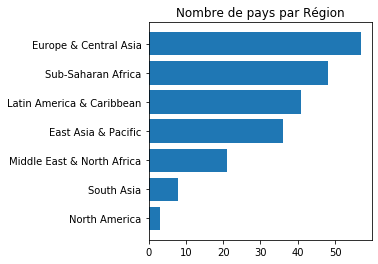

In [10]:
plt.figure(figsize=(4,4))
#sns.barplot(x= country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values(), y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'])
plt.barh(y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région')
plt.show()

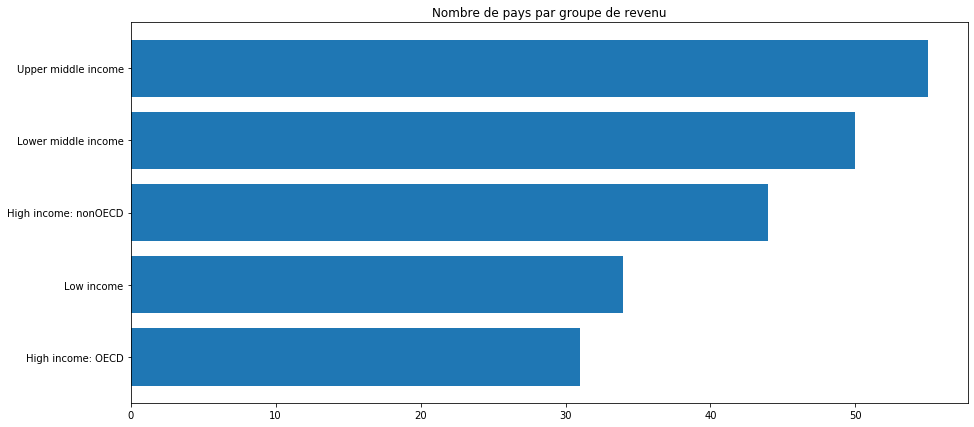

In [11]:
plt.figure(figsize=(15,7))
plt.barh(y = country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Income Group'], width = country.groupby('Income Group')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par groupe de revenu')
plt.show()

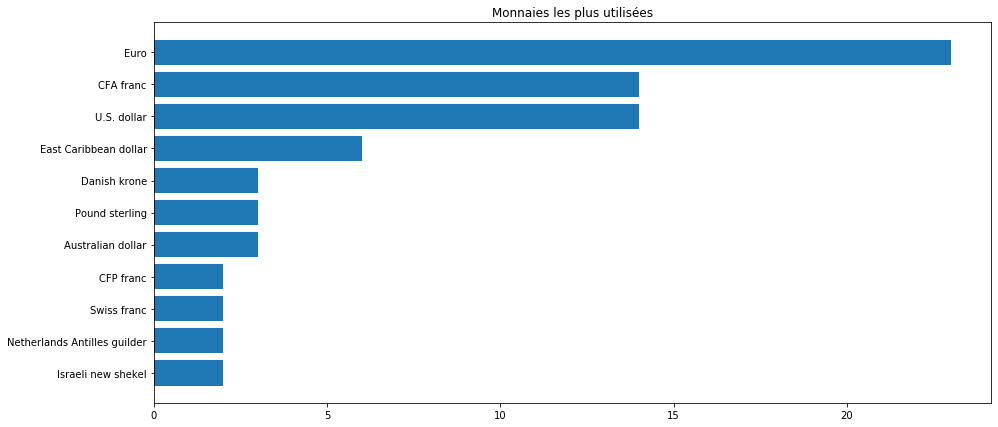

In [12]:
plt.figure(figsize=(15,7))
plt.barh(y = country.groupby('Currency Unit')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Currency Unit'].tail(11), width = country.groupby('Currency Unit')[['Short Name']].count()['Short Name'].sort_values().tail(11))
plt.title('Monnaies les plus utilisées')
plt.show()

**EdStatsCountry-Series.csv**

In [13]:
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')

In [14]:
countryseries.head(3)

CountryCode   SeriesCode  \
0  ABW         SP.POP.TOTL   
1  ABW         SP.POP.GROW   
2  AFG         SP.POP.GROW   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects NaN          
1  Data sources: United Nations World Population Prospects  NaN          
2  Data sources: United Nations World Population Prospects  NaN

EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv

In [15]:
countryseries['CountryCode'].nunique()

211

On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?

In [16]:
country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']]

Short Name
5    Arab World                                    
47   Curaçao                                       
57   East Asia & Pacific (developing only)         
58   East Asia & Pacific (all income levels)       
59   Europe & Central Asia (developing only)       
60   Europe & Central Asia (all income levels)     
63   Euro area                                     
68   European Union                                
89   High income                                   
92   Heavily indebted poor countries (HIPC)        
116  Latin America & Caribbean (developing only)   
122  Latin America & Caribbean (all income levels) 
123  Least developed countries: UN classification  
124  Low income                                    
127  Lower middle income                           
128  Low & middle income                           
134  St. Martin (French part)                      
140  Middle East & North Africa (all income levels)
143  Middle income                                 
148  Middle East & North Africa (developing only)  
157  North America                                 
166  Nauru                                         
168  OECD members                                  
187  South Asia                                    
198  Sub-Saharan Africa (developing only)          
199  South Sudan                                   
200  Sub-Saharan Africa (all income levels)        
207  Sint Maarten (Dutch part)                     
225  Upper middle income                           
234  World

La liste ne contient pas les regroupements de pays ni certains pays : Curaçao, St Martin, Nauru, South Sudan, Sint Marteen (Dutch Part



**EdStatsData.csv**

In [17]:
data = pd.read_csv('data/EdStatsData.csv', )

In [18]:
data_orig = data.copy()

In [19]:
data.sample(5)

Country Name Country Code  \
783925  Switzerland         CHE           
768876  Sudan               SDN           
799416  Timor-Leste         TLS           
875245  West Bank and Gaza  PSE           
553188  Mauritania          MRT           

                                                                                                                             Indicator Name  \
783925  UIS: Rate of out-of-school adolescents of lower secondary school age, second quintile, male (household survey data) (%)               
768876  SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 6 - Mathematically Skilled                                
799416  Barro-Lee: Percentage of population age 55-59 with primary schooling. Total (Incomplete and Completed Primary)                        
875245  Teachers in secondary vocational education, female (number)                                                                           
553188  Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Female   

              Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  \
783925  UIS.ROFST.H.2.Q2.M   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876  LO.SACMEQ.MAT.L6.MA  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416  BAR.PRM.ICMP.5559.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245  UIS.T.23.V.F         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
553188  PRJ.ATT.2024.3.FE    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
783925 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
553188 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
783925 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    1.0    
553188 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
783925 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245  32.0  36.0  15.0  31.0  61.0  94.0  49.0  60.0  64.0  80.0  86.0   
553188 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2011  2012  2013  2014  2015  2016  2017  2020  2025  2030  2035  \
783925 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245  60.0  69.0  73.0  75.0 NaN   NaN   NaN   NaN   NaN   NaN   NaN     
553188 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  2090  \
783925 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
768876 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
799416 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
875245 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
553188 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2095  2100  Unnamed: 69  
783925 NaN   NaN   NaN           
768876 NaN   NaN   NaN           
799416 NaN   NaN   NaN      

In [20]:
data.shape

(886930, 70)

In [21]:
data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [22]:
data['Indicator Name'].nunique()

3665

In [23]:
data['Indicator Code'].nunique()

3665

In [24]:
data['Country Name'].nunique()

242

In [25]:
data['Indicator Code'].nunique() * data['Country Name'].nunique() == data.shape[0]

True

In [26]:
#il n'y a pas de doublon et il y a une liste dans le dataframe pour chaque pays pour chacun de nos 3665 indicateurs

In [27]:
data[~data['Country Code'].isin(countryseries['CountryCode'].unique())]['Country Name'].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'British Virgin Islands',
 'Curacao',
 'Nauru',
 'Sint Maarten (Dutch part)',
 'South Sudan',
 'St. Martin (French part)']

On retrouve la même liste de pays et zones géographiques que dans nos précédentes bases de données.

Combien y-a-t-il d'indicateurs par pays?

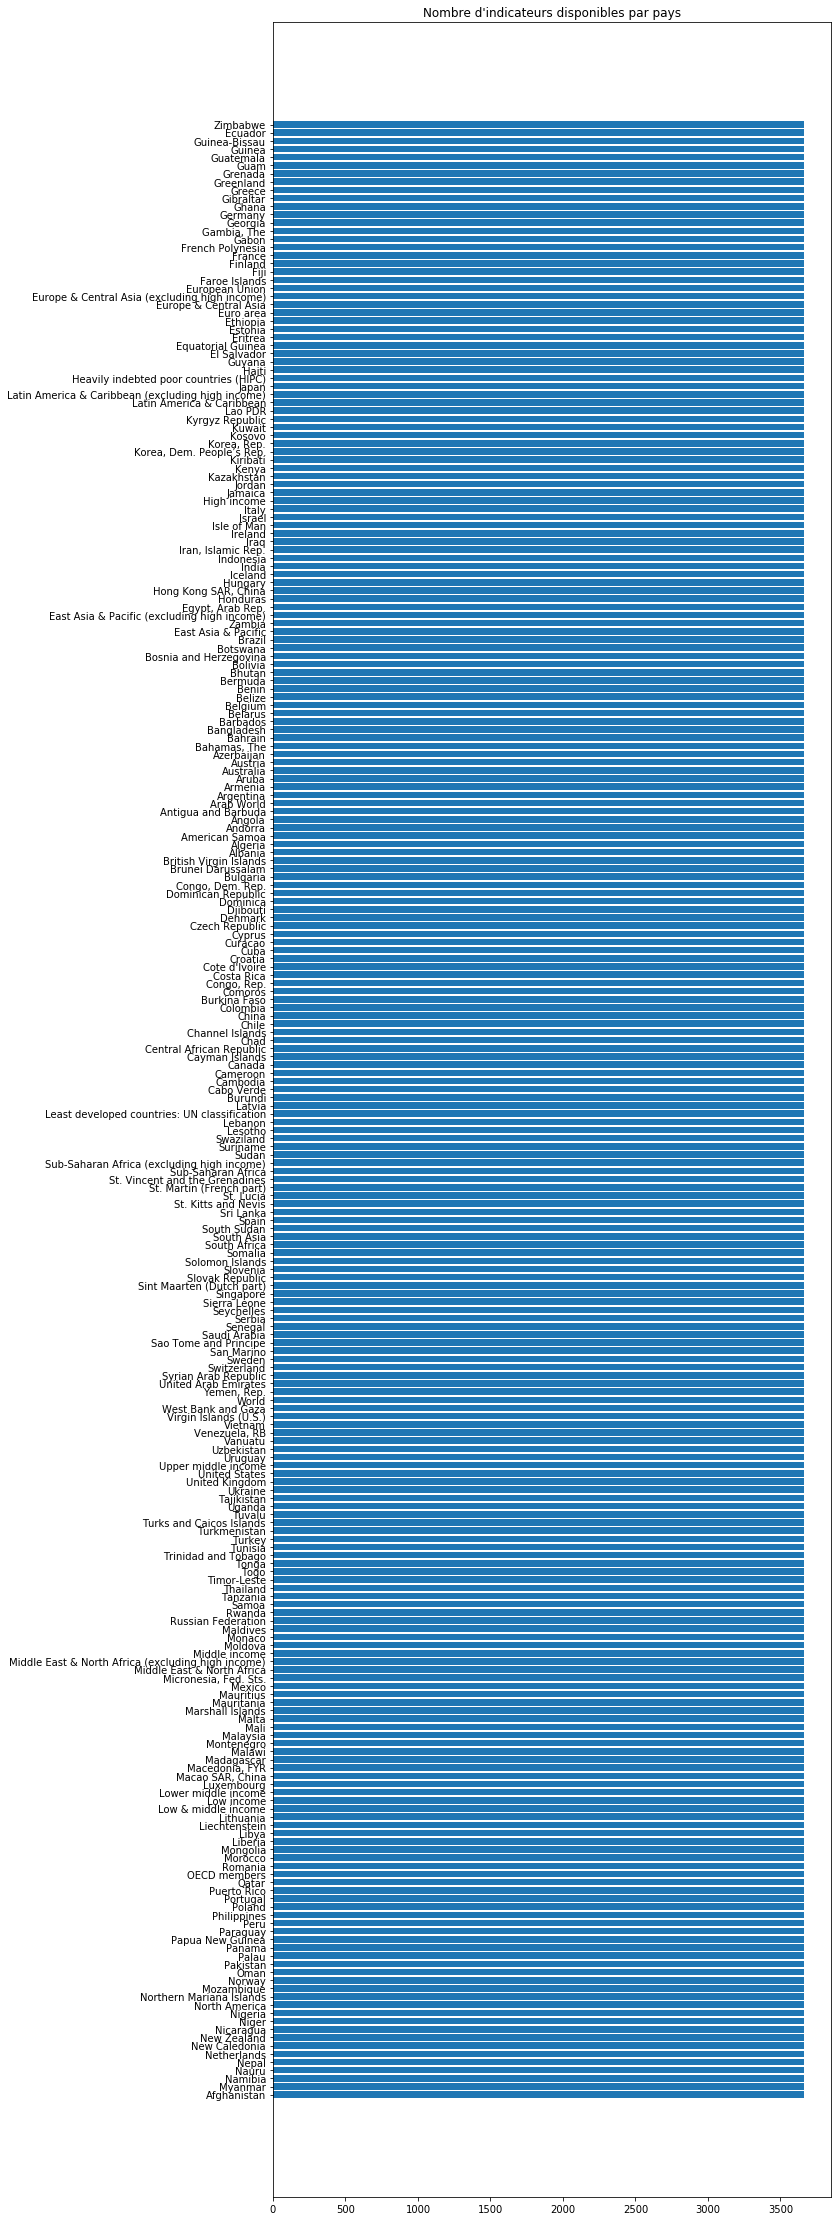

In [28]:
plt.figure(figsize=(10,40))
plt.barh(y = data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Country Name'], 
         width =  data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'])
plt.title('Nombre d\'indicateurs disponibles par pays')
plt.show()

In [29]:
print(data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'].min())
print( data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'].max())

3665
3665


beaucoup d'indicateurs (3665 uniques) => voir comment les exploiter

Quels sont les mots qui reviennent le plus souvent dans les noms des indicateurs?

In [30]:
import collections
liste_mots_indicateurs = [i.split(' ', 1)[0] for i in data['Indicator Name'].tolist()]
mots_indicateurs_populaires = collections.Counter(liste_mots_indicateurs).most_common(30)

In [31]:
mots_indicateurs_populaires
mots_indicateurs_populaires.reverse()

In [32]:
df_mots_indicateurs_populaires = pd.DataFrame(mots_indicateurs_populaires, columns = ['Mot', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', ascending=False)

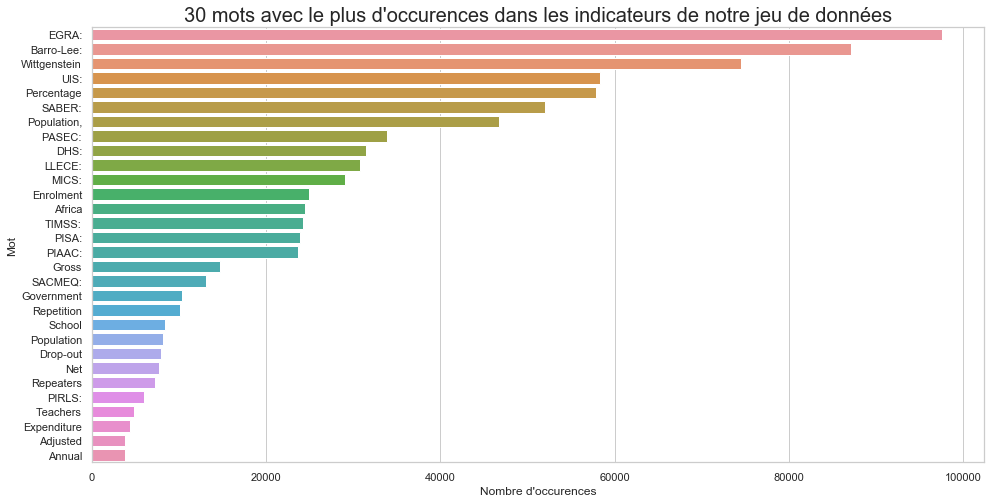

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Mot', x='Nombre d\'occurences', data = df_mots_indicateurs_populaires)
plt.title('30 mots avec le plus d\'occurences dans les indicateurs de notre jeu de données', size=20)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

La recherche des mots les plus populaires dans les noms des indicateurs confirme bien que le jeu de données contient des données relatives à l'éducation. Pour les mots avec le plus d'occurence, par exemple : 
* EGRA : Early Grade Reading Assessment
* Barro-lee : Dataset relatif à l'éducation
* Wittgenstein : Wittgenstein Centre Human Capital Data Explore
* UIS : UNESCO Institut de Statistiques
* PISA : Tests comparatifs de compétences pour les élèves
* Teachers
* School

EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays et zones géographiques du monde

**EdStatsFootNote.csv**

In [34]:
footnote = pd.read_csv('data/EdStatsFootNote.csv')

In [35]:
footnote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0  ABW         SE.PRE.ENRL.FE  YR2001  Country estimation. NaN        
1  ABW         SE.TER.TCHR.FE  YR2005  Country estimation. NaN        
2  ABW         SE.PRE.TCHR.FE  YR2000  Country estimation. NaN        
3  ABW         SE.SEC.ENRL.GC  YR2004  Country estimation. NaN        
4  ABW         SE.PRE.TCHR     YR2006  Country estimation. NaN

footnote donne des Informations sur année d'origine des données et description des données
la colonne Year n'est pas vraiment utilisable en l'état, on va la nettoyer:

In [36]:
footnote['DESCRIPTION'].unique().tolist()

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

In [37]:
footnote['Year'] = footnote['Year'].apply(lambda x : x[2:])

In [38]:
footnote.drop(['Unnamed: 4'], axis=1, inplace=True)

In [39]:
footnote.head()

CountryCode      SeriesCode  Year          DESCRIPTION
0  ABW         SE.PRE.ENRL.FE  2001  Country estimation.
1  ABW         SE.TER.TCHR.FE  2005  Country estimation.
2  ABW         SE.PRE.TCHR.FE  2000  Country estimation.
3  ABW         SE.SEC.ENRL.GC  2004  Country estimation.
4  ABW         SE.PRE.TCHR     2006  Country estimation.

In [40]:
footnote.shape

(643638, 4)

In [41]:
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

On retrouve les mêmes années que dans les précédents dataset. Combien avons nous de données par année?

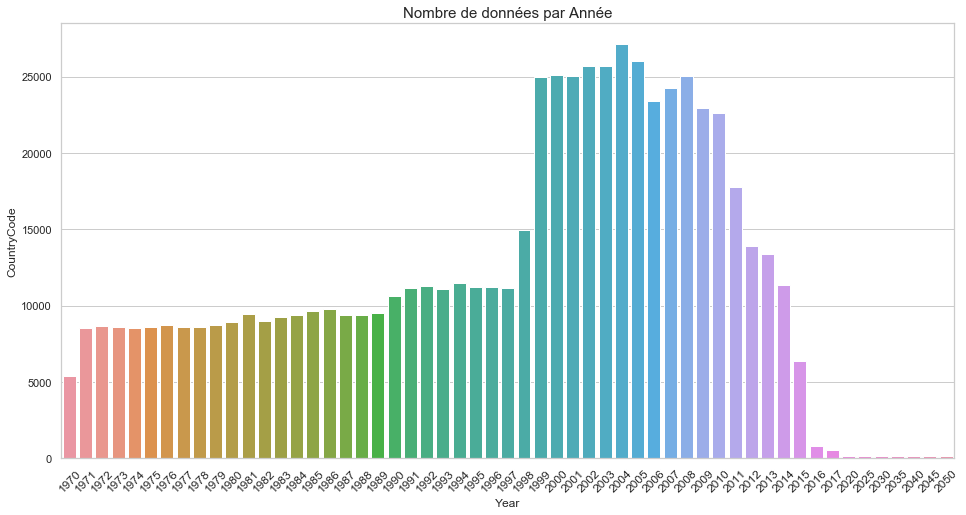

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Nombre de données par Année', size=15)
plot = sns.barplot(y = 'CountryCode', x='Year', data = footnote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = footnote.groupby('Year').count().reset_index()['Year'], rotation=45, size=12)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

**On va tenter de faire des groupes d'années pour réduire le nombre de NaN dans data**

In [43]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [44]:
data_copy = data.copy()

In [45]:
data['1970s'] = data[[str(year) for year in range(1970,1980,1)]].mean(1)

data['1980s'] = data[[str(year) for year in range(1980,1990,1)]].mean(1)
data['1990s'] = data[[str(year) for year in range(1990,2000,1)]].mean(1)
data['2000s'] = data[[str(year) for year in range(2000,2010,1)]].mean(1)
data['2010s'] = data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data['2020s'] = data[[str(year) for year in [2020,2025]]].mean(1)
data['2030s'] = data[[str(year) for year in [2030,2035]]].mean(1)
data['2040s'] = data[[str(year) for year in [2040,2045]]].mean(1)
data['2050s'] = data[[str(year) for year in [2050,2055]]].mean(1)
data['2060s'] = data[[str(year) for year in [2060,2065]]].mean(1)
data['2070s'] = data[[str(year) for year in [2070,2075]]].mean(1)
data['2080s'] = data[[str(year) for year in [2080,2085]]].mean(1)
data['2090s'] = data[[str(year) for year in [2090,2095]]].mean(1)
data['2100s'] = data[[str(2100)]].mean(1)

In [46]:
data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)


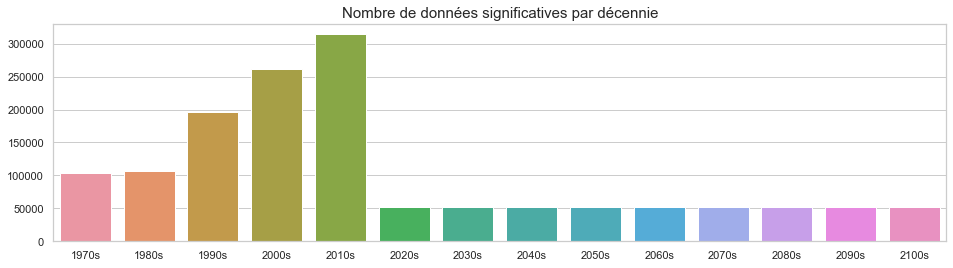

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par décennie', size=15)
plot = sns.barplot(y = data.shape[0] - data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

La décennie des 2010 est celle où on a le plus de données significatives (ou le moins de NaN). Ce résultat n'est pas étonnant puisque c'est la décennie de la montée en puissance de la donnée.
On va se baser sur cette décennie pour la suite de nos analyses


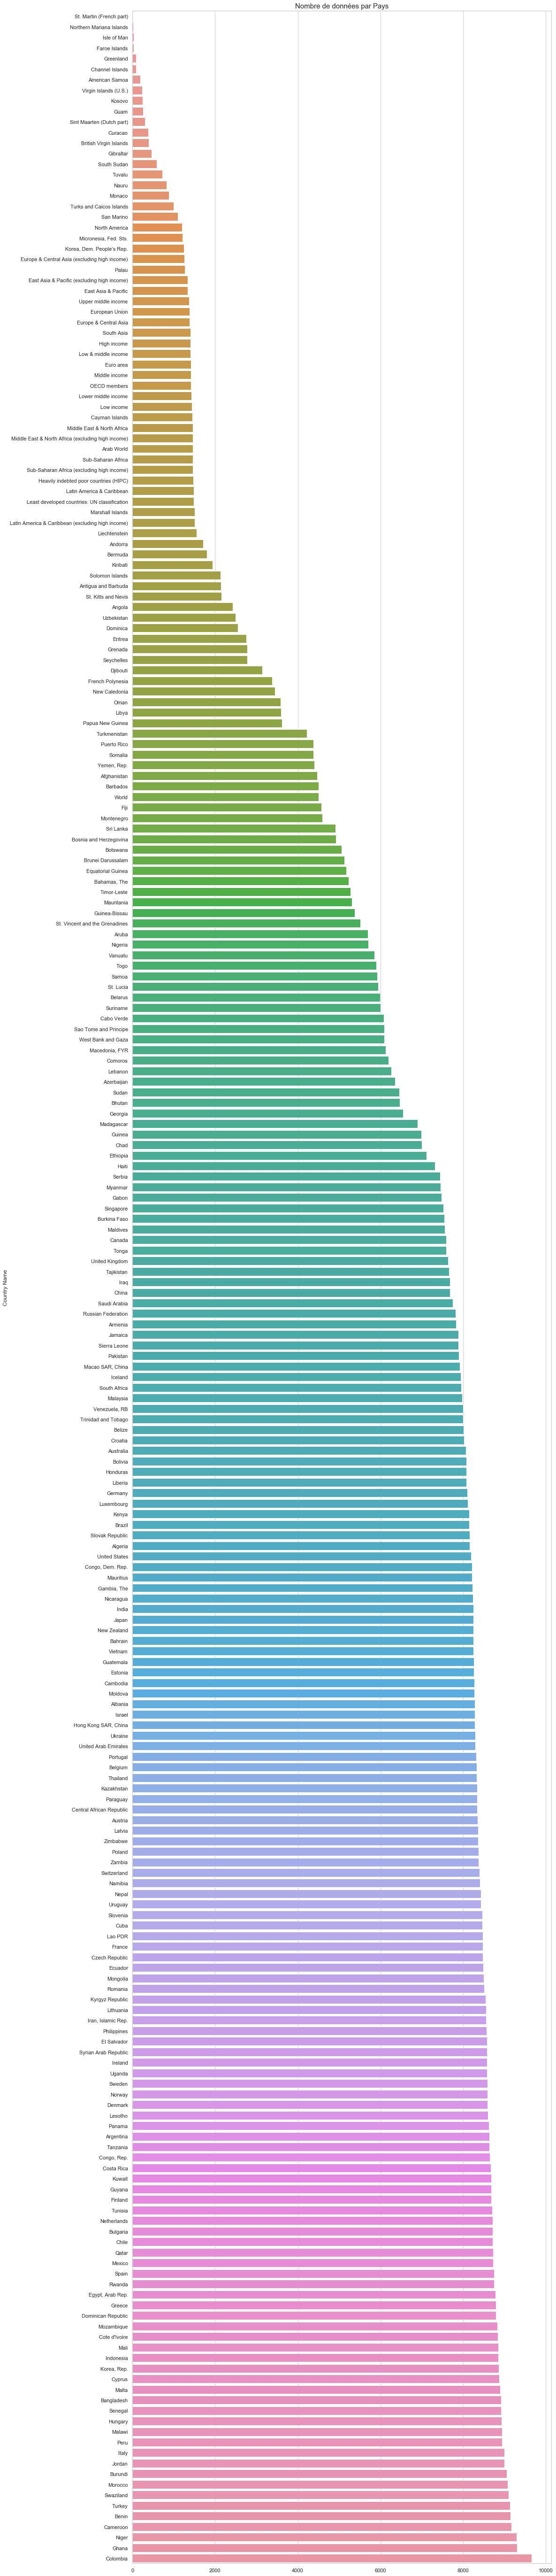

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()

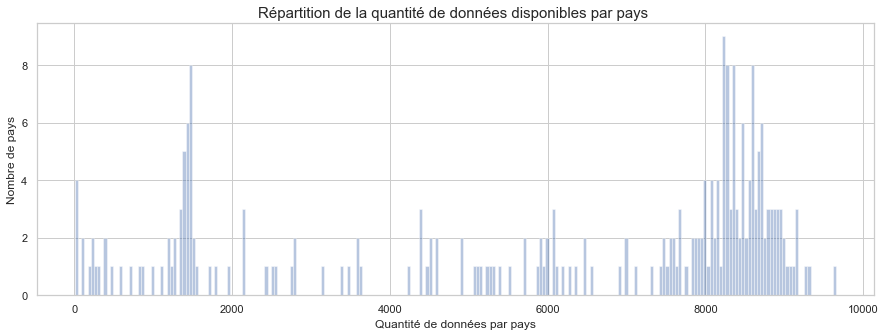

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()

Les pays pour lesquels on a moins d'informations sont:
* Les "petits" pays (faible superficie / faible population
* Les nouveaux pays (kosovo)
* Les régions et groupes de pays (east asia & pacific, upper middle income, etc.

On va regrouper les bases de données data et country, de façon à avoir les régions pour chaque pays et pouvoir faire des regroupements

In [50]:
data = data.merge(right = country[['Country Code', 'Region']], 
                  on='Country Code', how='left')

In [51]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

In [52]:
data_decades = data.copy()

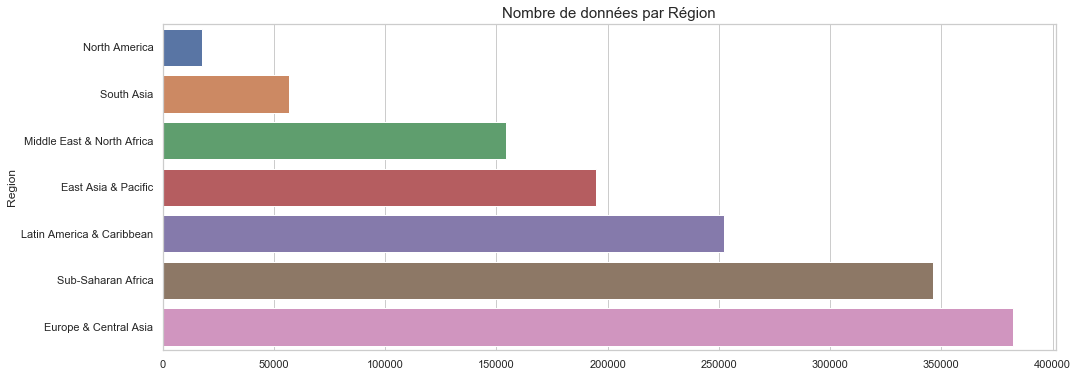

In [53]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
plt.title('Nombre de données par Région', size=15)
plot = sns.barplot(x = data.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = data.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()

On voit qu'on a beaucoup plus de données pour l'Europe et l'Afrique sub saharienne que l'amérique du nord ou l'Asie du Sud.
On peut expliquer ce résultat par le nombre de pays dans chaque région du globe. Ce graphe n'apporte pas d'information utile à la problématique

**EdStatsSeries.csv**

In [54]:
series = pd.read_csv('data/EdStatsSeries.csv')

In [55]:
series.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1  BAR.NOED.1519.ZS     Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1  Barro-Lee: Percentage of population age 15-19 with no education          
2  Barro-Lee: Percentage of female population age 15+ with no education     

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0 NaN               NaN         NaN         NaN         NaN                 
1 NaN               NaN         NaN         NaN         NaN                 
2 NaN               NaN         NaN         NaN         NaN                 

  Limitations and exceptions  Notes from original source General comments  \
0  NaN                       NaN                          NaN               
1  NaN                       NaN                          NaN               
2  NaN                       NaN                          NaN               

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0  NaN                                 NaN                    
1  NaN                                 NaN                    
2  NaN                                 NaN                    

  Related source links  Other web links  Related indicators  License Type  \
0  NaN                 NaN              NaN                 NaN             
1  NaN                 NaN              NaN                 NaN             
2  NaN                 NaN              NaN                 NaN             

   Unnamed: 20  
0 NaN           
1 NaN           
2 NaN

In [56]:
series.shape

(3665, 21)

Données descriptives sur les indicateurs socio économiques disponibles dans data


On vérifie qu'on a le même nombre d'indicateurs dans les 2 datasets

In [57]:
series['Series Code'].nunique() == data['Indicator Code'].nunique()

True

### Pré Analyse des données

In [58]:
country.isna().sum().sort_values(ascending=False)

Unnamed: 31                                          241
National accounts reference year                     209
Alternative conversion factor                        194
Other groups                                         183
Latest industrial data                               134
Vital registration complete                          130
External debt Reporting status                       117
Latest household survey                              100
Latest agricultural census                           99 
Lending category                                     97 
PPP survey year                                      96 
Special Notes                                        96 
Source of most recent Income and expenditure data    81 
Government Accounting concept                        80 
Latest water withdrawal data                         62 
Balance of Payments Manual in use                    60 
IMF data dissemination standard                      60 
Latest trade data              

In [59]:
country.duplicated(keep=False).sum()

0

In [60]:
countryseries.isna().sum().sort_values(ascending=False)

Unnamed: 3     613
DESCRIPTION    0  
SeriesCode     0  
CountryCode    0  
dtype: int64

In [61]:
countryseries.duplicated(keep=False).sum()

0

In [62]:
data.isna().sum().sort_values(ascending=False)

2020s             835494
2090s             835494
2080s             835494
2070s             835494
2060s             835494
2050s             835494
2040s             835494
2030s             835494
2100s             835494
1970s             783909
1980s             780067
1990s             690339
2000s             626092
2010s             572655
Region            102620
Indicator Code    0     
Indicator Name    0     
Country Code      0     
Country Name      0     
dtype: int64

In [63]:
data.duplicated(keep=False).sum()

0

In [64]:
footnote.isna().sum().sort_values(ascending=False)

DESCRIPTION    0
Year           0
SeriesCode     0
CountryCode    0
dtype: int64

In [65]:
footnote.duplicated(keep=False).sum()

0

In [66]:
series.isna().sum().sort_values(ascending=False)

Unnamed: 20                            3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
License Type                           3665
Notes from original source             3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Source                                 0   
Long definition                        0   
Indicator Name                         0   
Topic                                  0   
Series Code                            0   
dtype: int64

In [67]:
series.duplicated(keep=False).sum()

0

In [68]:
import inspect
def retrieve_name(var):
    '''afficher le nom d\'une variable '''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
list_dataset = [country, countryseries, data, footnote, series]
for dataset in list_dataset:
    print('{} possède {} lignes et {} colonnes.'.format(retrieve_name(dataset)[0], dataset.shape[0], dataset.shape[1]))

country possède 241 lignes et 32 colonnes.
countryseries possède 613 lignes et 4 colonnes.
data possède 886930 lignes et 19 colonnes.
footnote possède 643638 lignes et 4 colonnes.
series possède 3665 lignes et 21 colonnes.


**Bilan sur le contenu de chaque fichier:**
* Country : EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde
    certaines valeurs manquent pour de nombreux pays, parfois la majorité des pays. Aucun doublon


* Country Series : EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon


* Data :  EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays du monde et macro régions du monde: 
    Beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, il y a potentiellement certains indicateurs pour lesquels des données manquent. on remarque qu'il y a exactement le même nombre de valeurs manquantes pour les années >= 2020. Aucun doublon


* Footnote :  footnote donne des informations sur année d'origine des données et description des données
    les valeurs manquantes correspondent à la colonne "Unnamed:4" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon


* Series :  Series donne des données descriptives sur les indicateurs socio économiques disponibles dans data.
    6 colonnes pour lesquelles il manque toutes les valeurs et qu'on pourrait supprimer (dont Unnamed: 20). Il manque plus de 80 % des valeurs pour 10 autres colonnes. et près de 50 % des valeurs pour la colonne "short definition".  Aucun doublon

### Bilan sur le dataset
* Le dataset comporte bien des données éducatives
* Tous les pays du monde semblent y être intégrés
* Il semble y avoir un nombre important de données par pays pour procéder à des analyses comparatives
* un regroupement par décennies permet de voir que procéder à une analyse sur la période 2010-2017 devrait permettre de procéder à une première analyse.

* **On va procéder à notre analyse en utilisant les donnnées de data enrichies de l'information "Region" pour faire des analyses d'indicateurs par groupes de pays.**

## Analyse Exploratoire des données

#### Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)


In [69]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

On va procéder à une première analyse en utilisant les colonnes suivantes:
'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010s', 'Region'

In [70]:
data_short = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]

**Il faut maintenant sélectionner les indicateurs pertinents**

Quels sont les indicateurs avec le plus de données?

In [71]:
data_short[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

2010s
Indicator Name                                                                                    
Population, total                                                                            240  
Population growth (annual %)                                                                 240  
GDP per capita (current US$)                                                                 229  
GDP at market prices (current US$)                                                           229  
Internet users (per 100 people)                                                              229  
...                                                                                          ...  
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade  0    
EGRA: Correct Letter Sounds Read Per Minute (Mean). English. 4th Grade                       0    
SACMEQ: Mean performance on the reading scale, total                                         0    
SACMEQ: Mean performance on the reading scale, male                                          0    
EGRA: Correct Letter Names Read Per Minute (Mean). English. 3rd Grade                        0    

[3665 rows x 1 columns]

[]

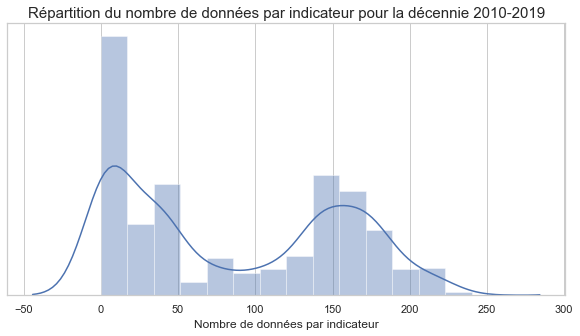

In [72]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la décennie 2010-2019', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
sns.distplot(data_short[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False))
plt.plot()

On voit qu'on a 2 pics intéressants : 
* il y a beaucoup d'indicateurs avec très peu de données (<50)
* il y a beaucoup d'indicateurs avec plus de données (autour de 160)


On pourrait penser qu'on a 2 distributions qui se somment : une correspondant aux pays (moyenne du nombre de données par indicateur autour de 150) , l'autre aux groupes de pays (moyenne du nombre de données inférieure à 50).

Observons le nombre de NaN par indicateur

In [73]:
data_short['NaN'] = data_short[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data_heat = data_short[['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

[]

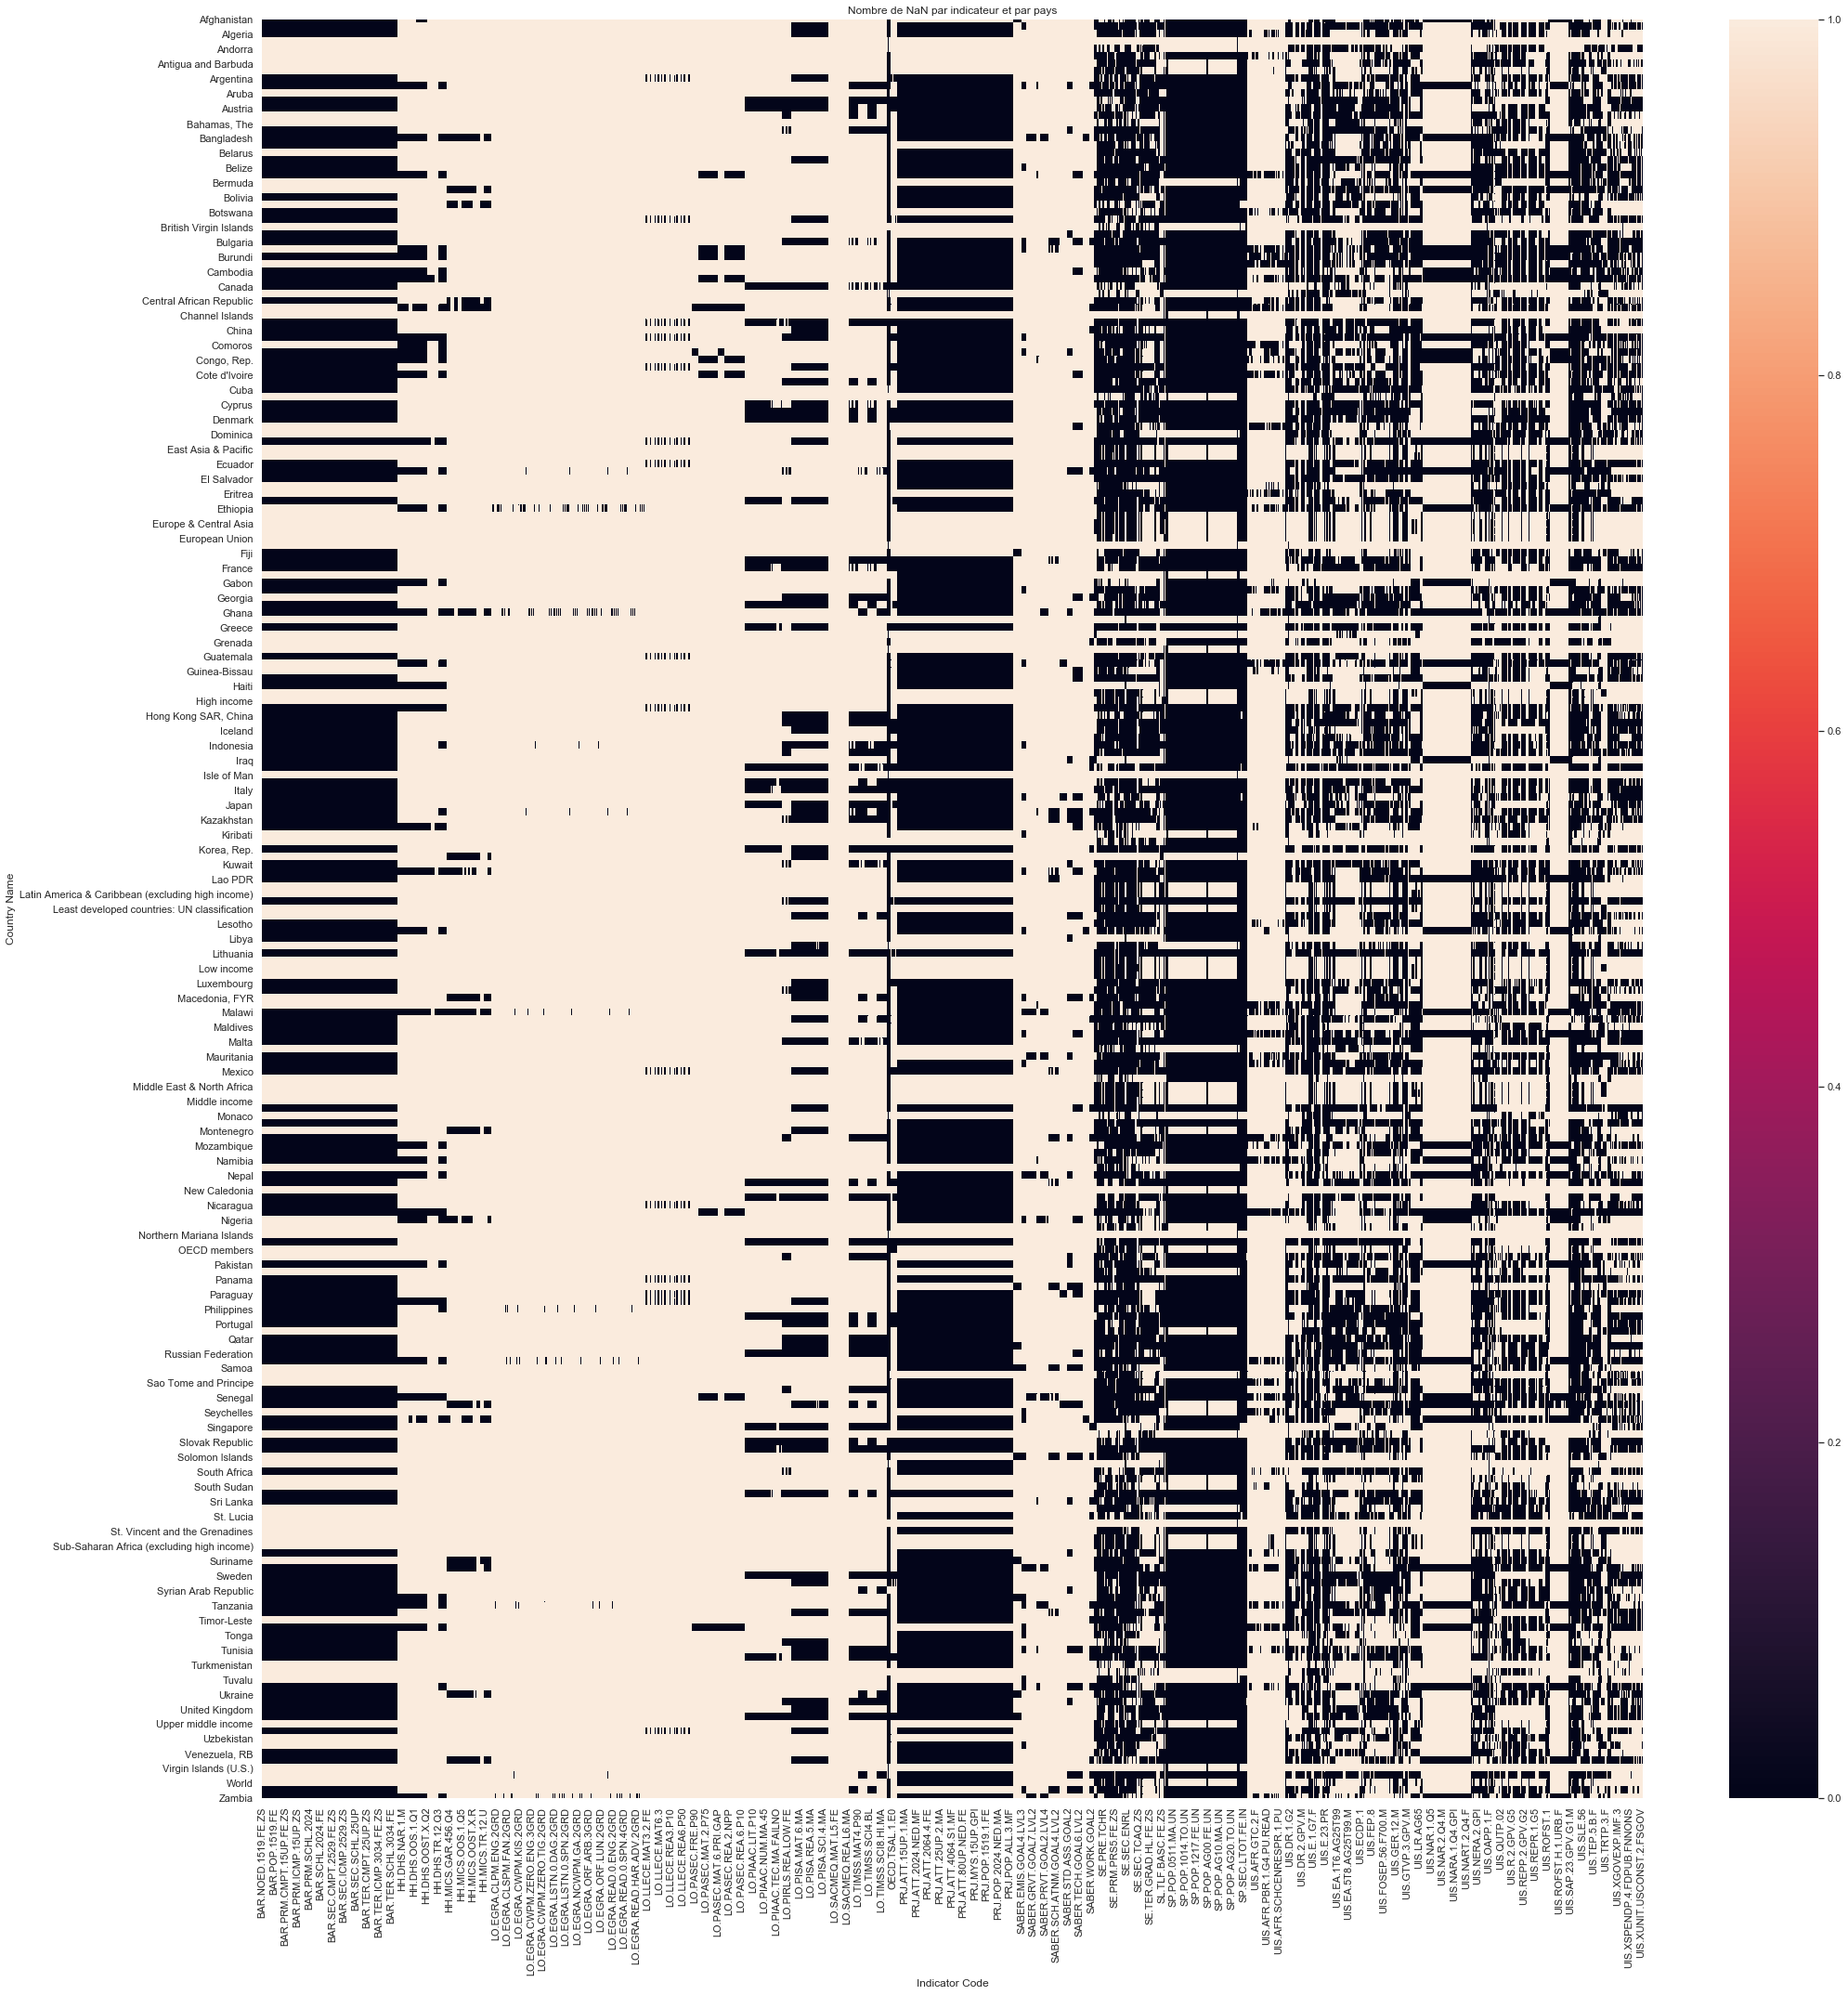

In [75]:
plt.figure(figsize=(30,30))
plt.title('Nombre de NaN par indicateur et par pays')

ax = sns.heatmap(data = data_heat)
plt.tight_layout()
plt.plot()

Il y a trop d'indicateurs pour qu'ils puissent tous être affichés mais : 
On voit que certaines catégories d'indicateurs ont tendance à avoir moins de NaN que d'autres. en particulier:
* ceux de préfixe HH
* ceux de préfixe LO
* ceux de préfixe SABER
* ceux de préfixe UIS.AFR
* ceux de préfixe UIS.NAR

A contrario, les indicateurs suivants semblent avoir beaucoup de NaN :
* ceux de préfixe BAR
* ceux de préfixe PRJ
* ceux de préfixe SE
* ceux de préfixe SP
* ceux de préfixe UIS sauf UIS.AFR et UIS.NAR

Concernant les pays, on observe quelques tendances mais le choix de l'indicateur semble avoir plus de répercusions sur le nombre de NaN que le choix du pays.

**Peut être que certaines données présentent peu de données mais uniquement pour des groupes de pays? Essayons de voir ce qu'il en est**

In [76]:
regions = country['Region'].unique().tolist()

In [77]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']

In [78]:
data_heat_countries =  data_short[~data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
data_heat_groupes = data_short[data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

[]

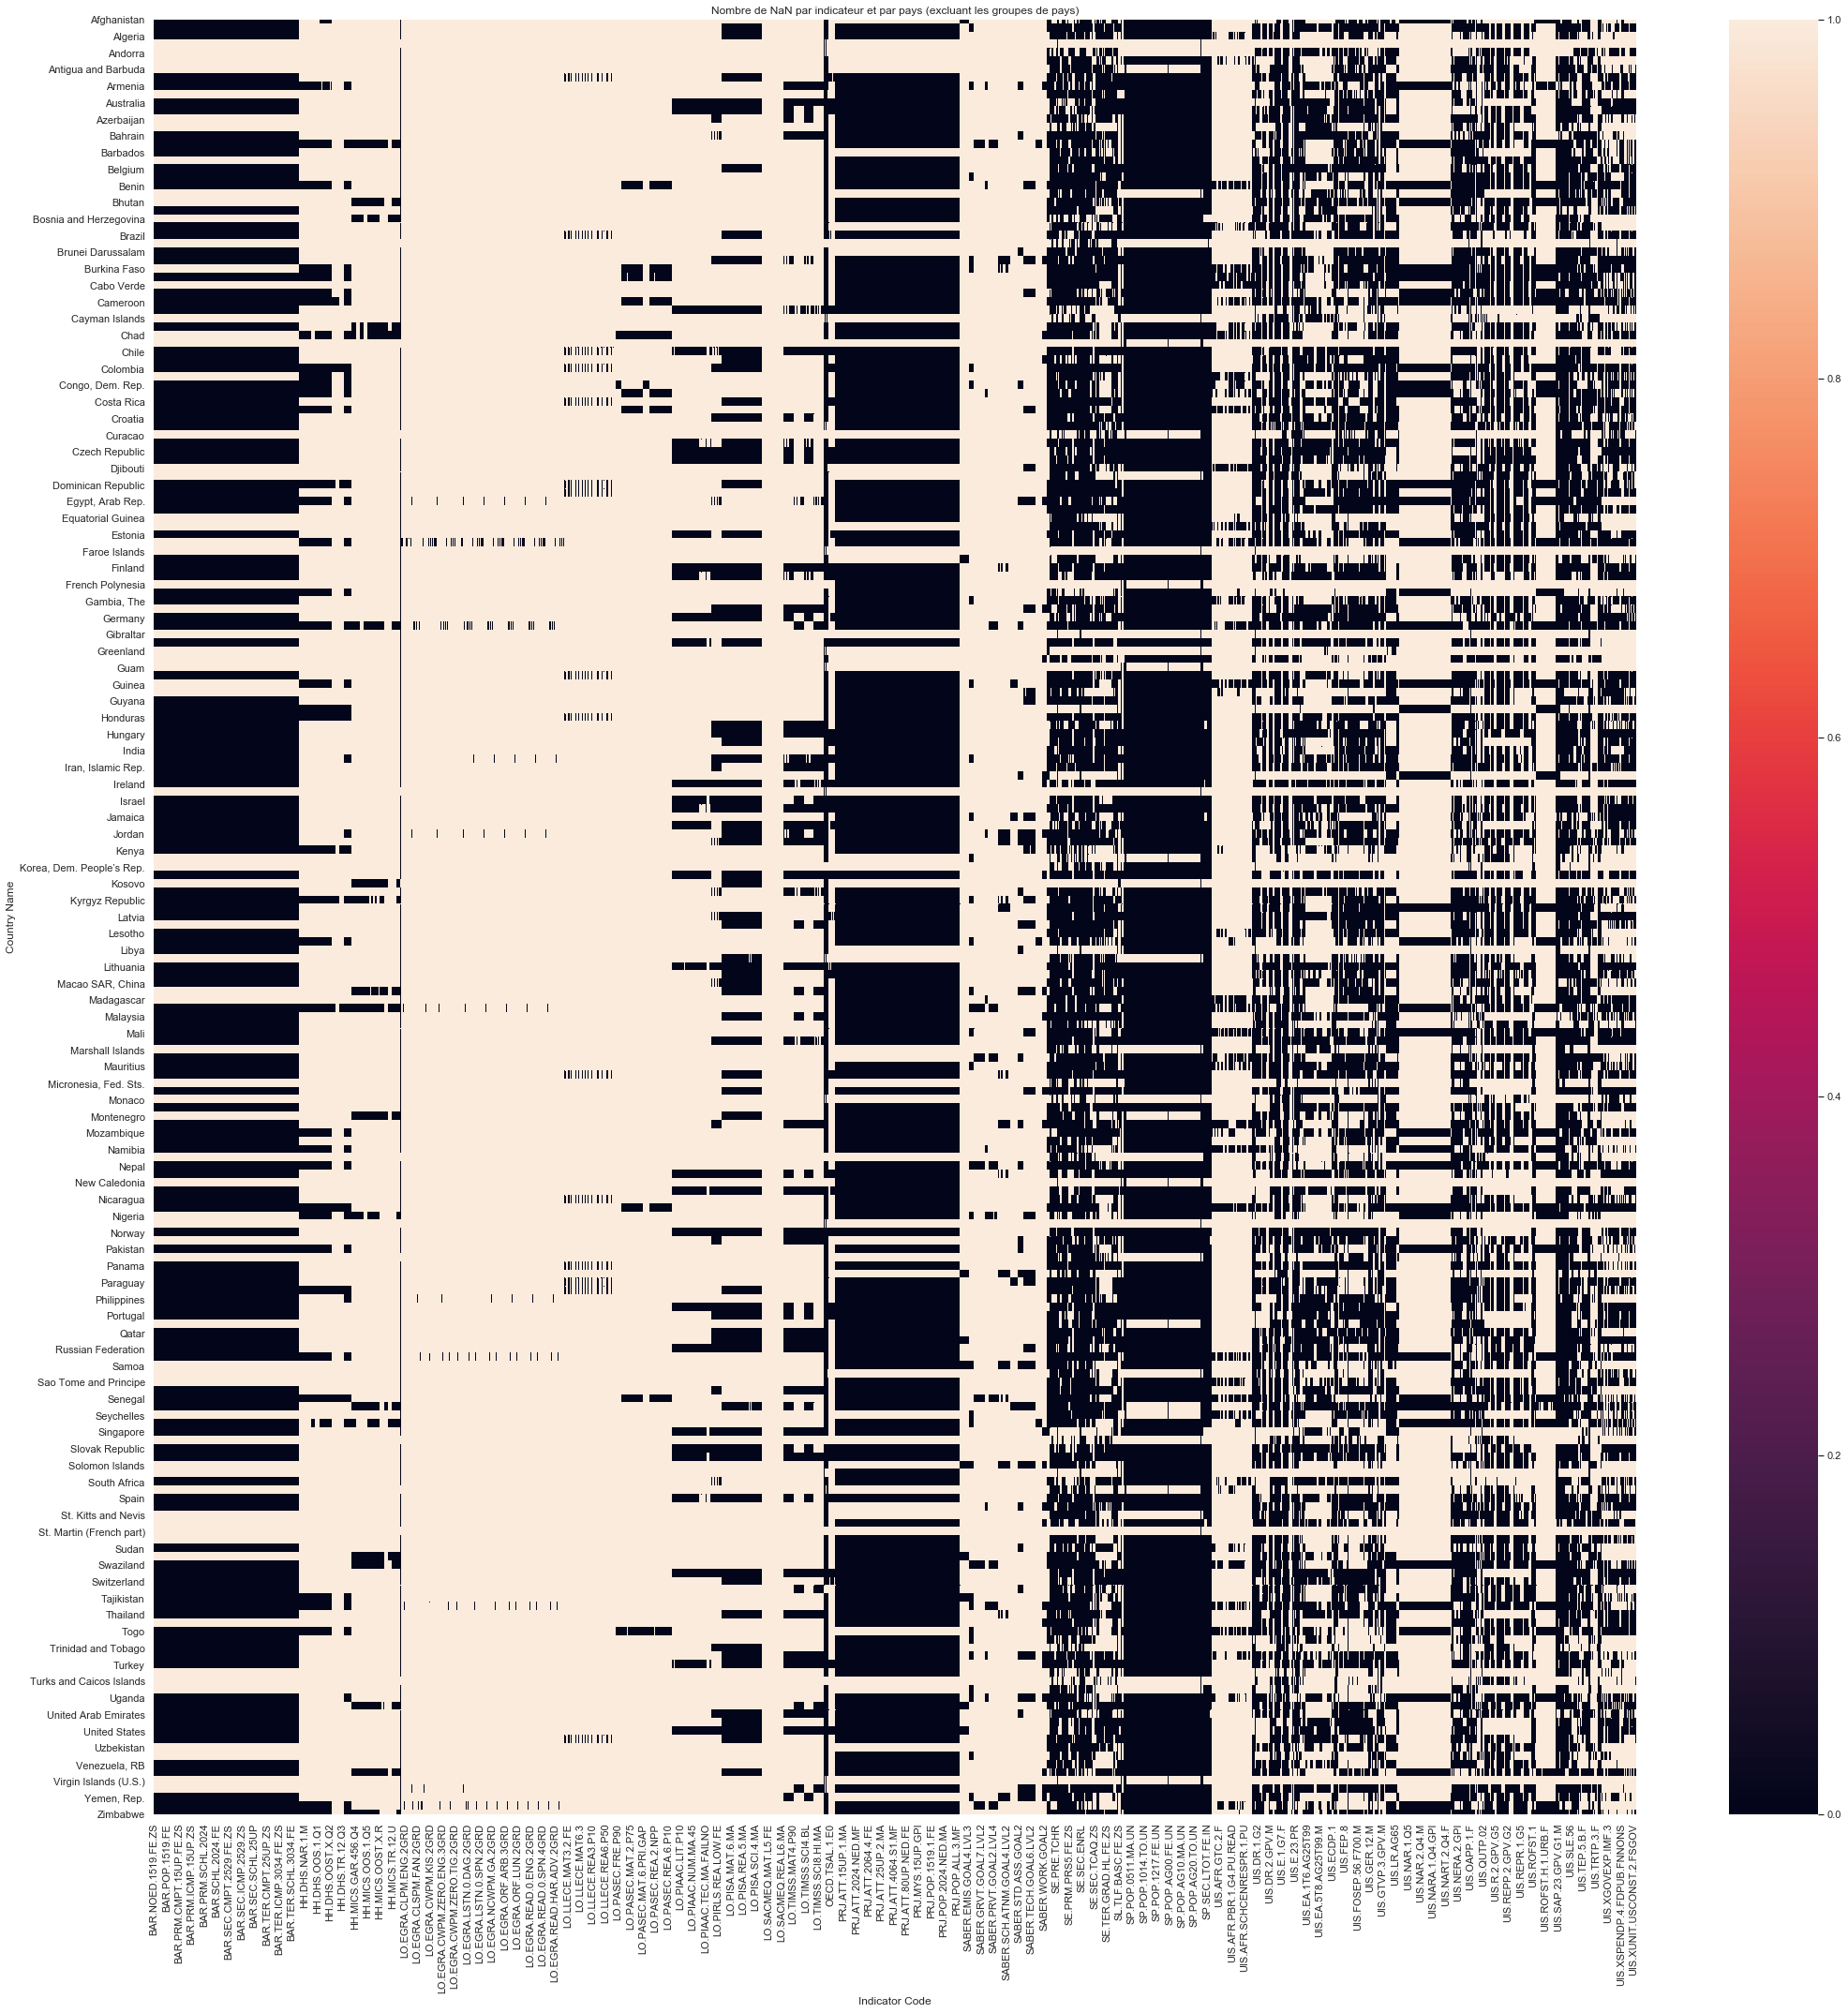

In [79]:
plt.figure(figsize=(30,30))
plt.title('Nombre de NaN par indicateur et par pays (excluant les groupes de pays)')

ax = sns.heatmap(data = data_heat_countries)
plt.tight_layout()
plt.plot()

Quand on extrait les pays
La matrice a la même alure que précédemment. On ne tirera pas de nouvelle conclusion sur les pays

[]

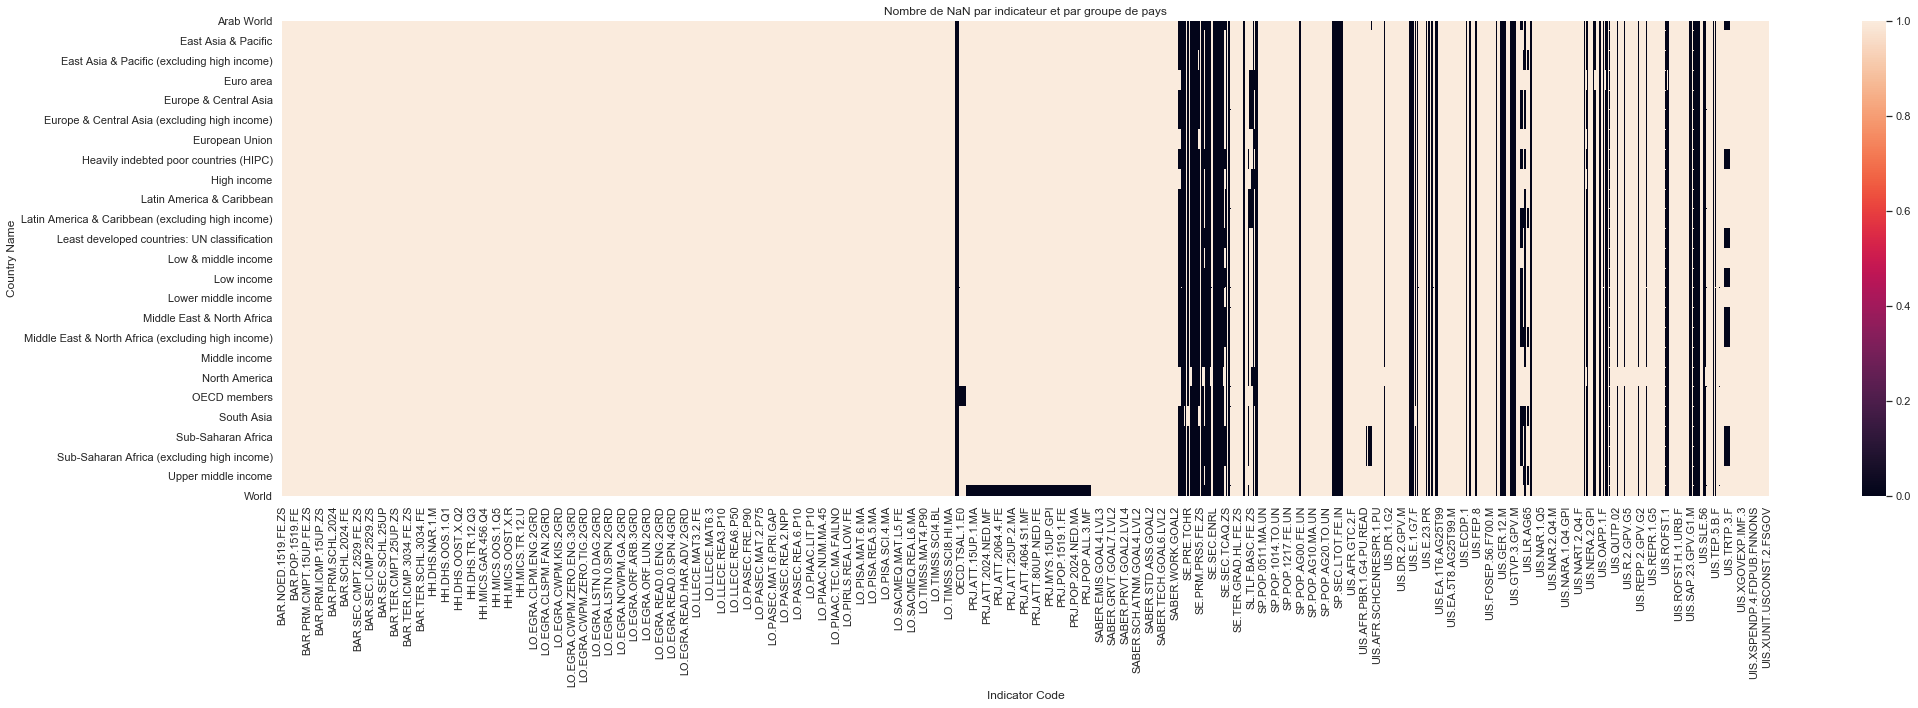

In [80]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()

On peut supprimer de notre heatmap les indicateurs composés uniquement de NaN :

In [81]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()==0].columns.tolist(), axis=1, inplace=True)

On retrace la heatmap

[]

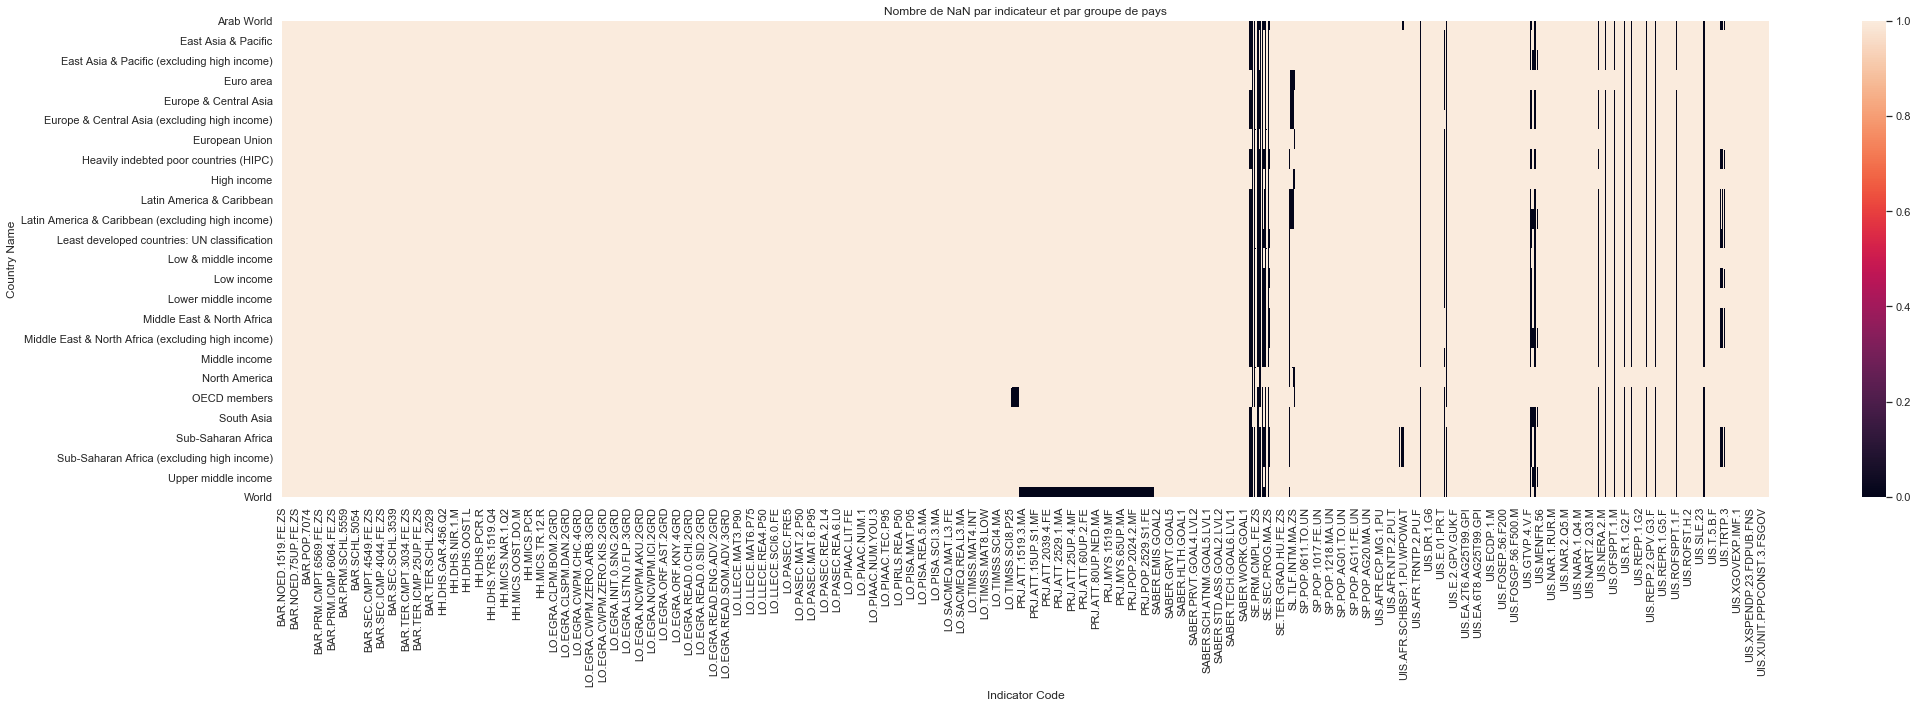

In [82]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()

Ce résultat est intéressant, on voit que pour de nombreux indicateurs, il n'y a aucun NaN pour les groupes de pays! C'est le cas notamment de:
* ceux de préfixe BAR
* ceux de préfixe HH
* ceux de préfixe LO
* ceux de préfixe SP.POP
* ceux de préfixe PRU (hors zone World)

#### Quels indicateurs retenir?

On va conserver les indicateurs qui ont plus de 80 % de données signifiantes pour les régions et pour les pays. En faisant le tri séparément

In [83]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()<= data_heat_groupes.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [84]:
indicateur_groupes = data_heat_groupes.columns.tolist()

In [85]:
data_heat_countries.drop(data_heat_countries.loc[:, data_heat_countries.sum()<= data_heat_countries.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [86]:
indicateur_countries = data_heat_groupes.columns.tolist()

On fait l'union des 2 groupes

In [87]:
indicateurs_a_conserver = list(dict.fromkeys(indicateur_groupes + indicateur_countries))

In [88]:
print('Nombre d\'indicateurs à conserver : ', len(indicateurs_a_conserver))
print('Proportion conservée vis à vis du dataset initial : ', round(len(indicateurs_a_conserver) / data['Indicator Code'].nunique(),2) *100 ,'%')

Nombre d'indicateurs à conserver :  3277
Proportion conservée vis à vis du dataset initial :  89.0 %


On filtre maintenant data en ne conservant que les indicateurs ci-dessus

In [89]:
data = data[data['Indicator Code'].isin(indicateurs_a_conserver)]

In [90]:
data['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number)',
 'Africa Dataset: Average number of pupil

Suite à la première analyse des données, on peut se focaliser sur la recherche des données par les indicateurs contenus dans "data"

In [91]:
data

Country Name Country Code  \
0       Arab World   ARB           
1       Arab World   ARB           
2       Arab World   ARB           
3       Arab World   ARB           
8       Arab World   ARB           
...            ...   ...           
886917  Zimbabwe     ZWE           
886918  Zimbabwe     ZWE           
886919  Zimbabwe     ZWE           
886920  Zimbabwe     ZWE           
886921  Zimbabwe     ZWE           

                                                                                                              Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)                                                           
1       Adjusted net enrolment rate, lower secondary, female (%)                                                               
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                                
3       Adjusted net enrolment rate, lower secondary, male (%)                                                                 
8       Adjusted net enrolment rate, upper secondary, both sexes (%)                                                           
...                                                              ...                                                           
886917  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Male             
886918  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Total            
886919  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Female   
886920  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male     
886921  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total    

          Indicator Code  1970s  1980s  1990s  2000s     2010s     2020s  \
0       UIS.NERA.2       NaN    NaN    NaN    NaN    NaN       NaN         
1       UIS.NERA.2.F     NaN    NaN    NaN    NaN    NaN       NaN         
2       UIS.NERA.2.GPI   NaN    NaN    NaN    NaN    NaN       NaN         
3       UIS.NERA.2.M     NaN    NaN    NaN    NaN    NaN       NaN         
8       UIS.NERA.3       NaN    NaN    NaN    NaN    NaN       NaN         
...            ...        ..     ..     ..     ..     ..        ..         
886917  PRJ.POP.ALL.1.MA NaN    NaN    NaN    NaN     760.565   633.205    
886918  PRJ.POP.ALL.1.MF NaN    NaN    NaN    NaN     1544.635  1307.275   
886919  PRJ.POP.ALL.3.FE NaN    NaN    NaN    NaN     1562.390  2209.315   
886920  PRJ.POP.ALL.3.MA NaN    NaN    NaN    NaN     1741.100  2284.025   
886921  PRJ.POP.ALL.3.MF NaN    NaN    NaN    NaN     3303.490  4493.345   

           2030s     2040s     2050s    2060s     2070s     2080s     2090s  \
0      NaN       NaN       NaN       NaN      NaN       NaN       NaN         
1      NaN       NaN       NaN       NaN      NaN       NaN       NaN         
2      NaN       NaN       NaN       NaN      NaN       NaN       NaN         
3      NaN       NaN       NaN       NaN      NaN       NaN       NaN         
8      NaN       NaN       NaN       NaN      NaN       NaN       NaN         
...     ..        ..        ..        ..       ..        ..        ..         
886917  505.360   377.385   275.405   195.77   138.270   99.260    72.885     
886918  1059.975  812.930   616.510   457.35   323.095   225.075   158.125    
886919  2779.000  3179.035  3397.600  3481.49  3480.180  3404.075  3283.290   
886920  2734.150  3015.255  3116.330  3092.81  3021.120  2942.980  2870.335   
886921  5513.155  6194.295  6513.930  6574.30  6501.305  6347.055  6153.625   

          2100s              Region  
0      NaN       NaN                 
1      NaN       NaN                 
2      NaN       NaN                 
3      NaN       NaN   

on veut identifier les pays avec un potentiel de lycéens et étudiants important. 

**liste des indicateurs :** http://datatopics.worldbank.org/education/indicators

**idées retenues :**
* des indicateurs pour quantifier l'utilisation d'internet dans les pays et zones
* des indicateurs pour quantifier le nombre d'étudiants et lycéens (quitte à faire des calculs à partir de ces indicateurs)
* des indicateurs pour quantifier les dépenses par étudiant pour voir dans quels pays les personnes seraient en capacité de payer pour des services supplémentaires


**indicateurs identifiés :**

**Ratios liés à l'éducation**
*  UIS.E.4                 Enrolment in post-secondary non-tertiary education, both sexes (number)
*  UIS.E.3                 Enrolment in upper secondary education, both sexes (number) 
*  SE.TER.ENRL             Enrolment in tertiary education, all programmes, both sexes (number)

**Dépenses liées à l'éducation**
*  UIS.X.USCONST.3.FSGOV

**Données démographiques:**
*  SP.POP.TOTL             Population, total 
*  SP.POP.1524.TO.UN       Population, ages 15-24, total 

**Percée de l'utilisation d'internet et des ordinateurs:**
*  IT.NET.USER.P2          Internet users (per 100 people) 
*  IT.CMP.PCMP.P2          Personal computers (per 100 people) 


In [92]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              'IT.CMP.PCMP.P2']

In [93]:
data_short[data_short['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

Indicator Name  \
6  Population, total                                                         
3  Internet users (per 100 people)                                           
2  Enrolment in upper secondary education, both sexes (number)               
1  Enrolment in tertiary education, all programmes, both sexes (number)      
5  Population, ages 15-24, total                                             
0  Enrolment in post-secondary non-tertiary education, both sexes (number)   
4  Personal computers (per 100 people)                                       

      Indicator Code  2010s  
6  SP.POP.TOTL        240    
3  IT.NET.USER.P2     229    
2  UIS.E.3            206    
1  SE.TER.ENRL        197    
5  SP.POP.1524.TO.UN  181    
0  UIS.E.4            137    
4  IT.CMP.PCMP.P2     0

On voit déjà qu'on peut retirer l'indicateur  IT.CMP.PCMP.P2 de la liste

In [94]:
indicateurs.pop()

'IT.CMP.PCMP.P2'

#### Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [95]:
data_countries = data_short[data_short['Country Name'].isin(list_countries)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
data_areas     = data_short[data_short['Country Name'].isin(areas)         ][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [96]:
def description_indicateurs(df, indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles = [0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [97]:
description_countries, df_countries = description_indicateurs(data_countries, indicateurs, 'Region')
description_zones, df_zones     = description_indicateurs(data_areas, indicateurs, 'Country Name')

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Vincent\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


On obtient un tableau récap de tous les indicateurs par Régions et par zone géographique :

In [98]:
description_countries

Region        UIS.E.4                                \
                                        mean            std            50%   
0  East Asia & Pacific         179427.537019  279200.588624  27841.000000    
1  Europe & Central Asia       50031.265382   133776.183721  10813.000000    
2  Latin America & Caribbean   53614.363158   180525.720490  3103.000000     
3  Middle East & North Africa  9253.450000    10918.928517   5705.125000     
4  North America               799251.325000 NaN             799251.325000   
5  South Asia                  128660.658333  172484.615145  57321.566667    
6  Sub-Saharan Africa          36579.266667   69361.871705   4679.000000     

                      UIS.E.3                                           \
            sum          mean           std          50%           sum   
0  2.332558e+06  3.104989e+06  9.740027e+06  148159.400   6.520477e+07   
1  1.901188e+06  6.133072e+05  9.304212e+05  263745.900   3.066536e+07   
2  1.018673e+06  6.772967e+05  1.758547e+06  124699.625   2.302809e+07   
3  9.253450e+04  4.005455e+05  5.018389e+05  159624.325   6.408728e+06   
4  7.992513e+05  4.468791e+06  6.342389e+06  1675808.500  1.340637e+07   
5  7.719639e+05  9.415460e+06  1.924265e+07  1262076.500  6.590822e+07   
6  6.950061e+05  4.447514e+05  8.523980e+05  136223.100   1.512155e+07   

    SE.TER.ENRL                                            \
           mean           std           50%           sum   
0  3.029385e+06  8.077084e+06  2.848391e+05  5.755832e+07   
1  6.263273e+05  9.512607e+05  2.672384e+05  3.069004e+07   
2  7.455761e+05  1.548927e+06  1.753212e+05  2.087613e+07   
3  3.503854e+05  4.031066e+05  2.153028e+05  5.606167e+06   
4  1.013747e+07  1.433487e+07  1.013747e+07  2.027494e+07   
5  4.065026e+06  9.607159e+06  3.545678e+05  3.252021e+07   
6  1.769331e+05  3.084462e+05  7.001240e+04  6.192660e+06   

  UIS.X.USCONST.3.FSGOV               SP.POP.TOTL                              \
                   mean std 50% sum          mean           std           50%   
0 NaN                   NaN NaN NaN  6.723616e+07  2.413255e+08  2.027884e+06   
1 NaN                   NaN NaN NaN  1.395836e+07  2.079457e+07  5.530253e+06   
2 NaN                   NaN NaN NaN  1.584672e+07  3.842041e+07  3.578169e+06   
3 NaN                   NaN NaN NaN  1.221741e+07  1.287527e+07  7.142249e+06   
4 NaN                   NaN NaN NaN  1.171520e+08  1.733197e+08  3.513338e+07   
5 NaN                   NaN NaN NaN  2.123718e+08  4.363642e+08  2.985991e+07   
6 NaN                   NaN NaN NaN  1.982501e+07  3.005546e+07  1.156291e+07   

                SP.POP.1524.TO.UN                                            \
            sum              mean           std           50%           sum   
0  2.151557e+09  1.461382e+07      4.340982e+07  1.438153e+06  3.361179e+08   
1  7.537515e+08  2.203308e+06      2.918516e+06  1.107469e+06  9.694557e+07   
2  5.863286e+08  3.457839e+06      7.053947e+06  1.337724e+06  1.002773e+08   
3  2.199133e+08  2.167307e+06      2.486249e+06  1.042890e+06  3.901152e+07   
4  3.514559e+08  2.484806e+07      2.884377e+07  2.484806e+07  4.969611e+07   
5  1.698974e+09  4.122661e+07      8.182133e+07  6.607114e+06  3.298129e+08   
6  8.524755e+08  4.068331e+06      6.184988e+06  2.361723e+06  1.668016e+08   

  IT.NET.USER.P2                                     
            mean        std        50%          sum  
0  39.110122      27.014509  34.764191  1134.193534  
1  66.374672      21.119148  65.785332  3385.108250  
2  45.178755      17.067168  45.003936  1536.077659  
3  51.630411      25.062528  56.625398  929.347404   
4  83.859491      10.156386  85.361429  251.578473   
5  18.698948      11.954131  15.420493  149.591586   
6  13.577007      12.049061  9.218154   570.234274

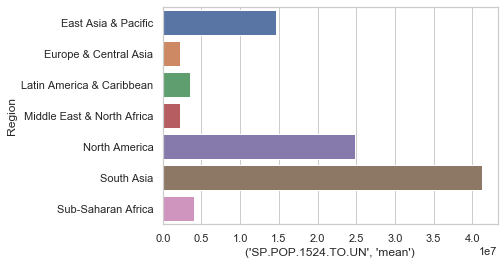

In [99]:
sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','mean')], y=description_countries['Region'])

In [100]:
description_zones.head()

Country Name       UIS.E.4      \
                                                          mean std   
0  Arab World                                     2.631211e+05 NaN   
1  East Asia & Pacific                            2.302949e+06 NaN   
2  East Asia & Pacific (excluding high income)    1.844454e+06 NaN   
3  Euro area                                      1.101148e+06 NaN   
4  Europe & Central Asia (excluding high income)  6.241610e+05 NaN   

                                  UIS.E.3                              \
            50%           sum        mean std         50%         sum   
0  2.631211e+05  2.631211e+05  11662032.4 NaN  11662032.4  11662032.4   
1  2.302949e+06  2.302949e+06  69637812.8 NaN  69637812.8  69637812.8   
2  1.844454e+06  1.844454e+06  62314336.0 NaN  62314336.0  62314336.0   
3  1.101148e+06  1.101148e+06  12966761.2 NaN  12966761.2  12966761.2   
4  6.241610e+05  6.241610e+05  13692785.4 NaN  13692785.4  13692785.4   

  SE.TER.ENRL                             UIS.X.USCONST.3.FSGOV              \
         mean std         50%         sum                  mean std 50% sum   
0  9222392.0  NaN  9222392.0   9222392.0  NaN                   NaN NaN NaN   
1  60141309.6 NaN  60141309.6  60141309.6 NaN                   NaN NaN NaN   
2  50806228.8 NaN  50806228.8  50806228.8 NaN                   NaN NaN NaN   
3  12889542.4 NaN  12889542.4  12889542.4 NaN                   NaN NaN NaN   
4  19073678.8 NaN  19073678.8  19073678.8 NaN                   NaN NaN NaN   

    SP.POP.TOTL                                 SP.POP.1524.TO.UN              \
           mean std           50%           sum              mean std 50% sum   
0  3.587756e+08 NaN  3.587756e+08  3.587756e+08 NaN               NaN NaN NaN   
1  2.250835e+09 NaN  2.250835e+09  2.250835e+09 NaN               NaN NaN NaN   
2  2.007695e+09 NaN  2.007695e+09  2.007695e+09 NaN               NaN NaN NaN   
3  3.376978e+08 NaN  3.376978e+08  3.376978e+08 NaN               NaN NaN NaN   
4  4.102482e+08 NaN  4.102482e+08  4.102482e+08 NaN               NaN NaN NaN   

  IT.NET.USER.P2                            
            mean std        50%        sum  
0  31.834459     NaN  31.834459  31.834459  
1  43.754148     NaN  43.754148  43.754148  
2  38.968510     NaN  38.968510  38.968510  
3  75.580997     NaN  75.580997  75.580997  
4  51.297737     NaN  51.297737  51.297737

On peut tracer des tableaux récapitulatifs des indicateurs par zone géographique

In [101]:
data_orig[data_orig['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

In [102]:
data_orig[data_orig['Indicator Code'].isin(['UIS.X.USCONST.3.FSGOV'])].count().sum()

0

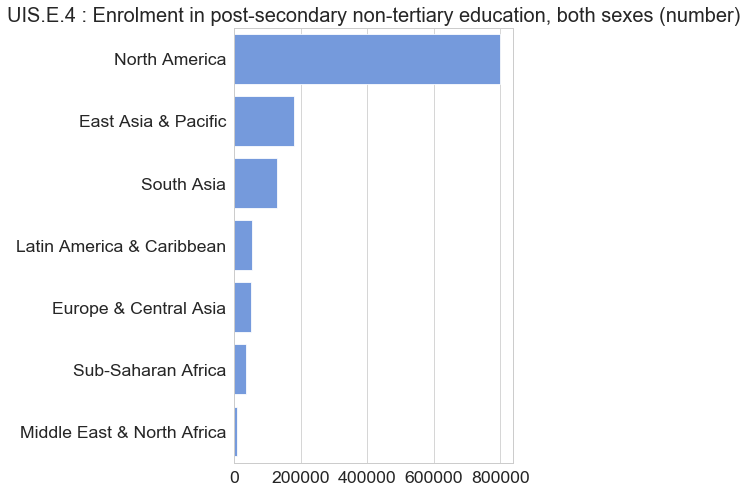

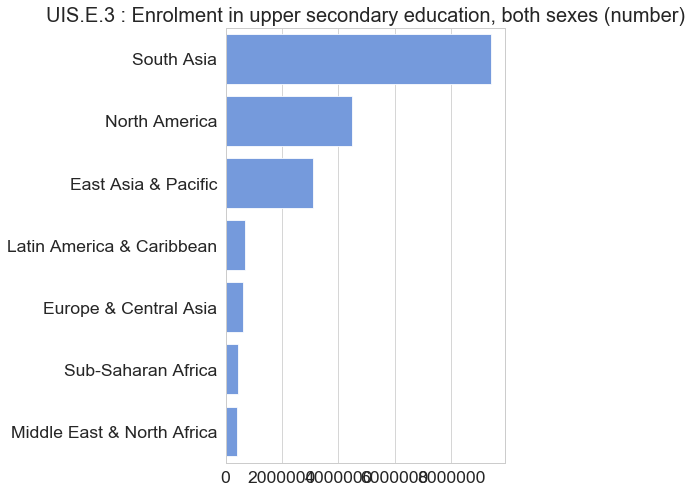

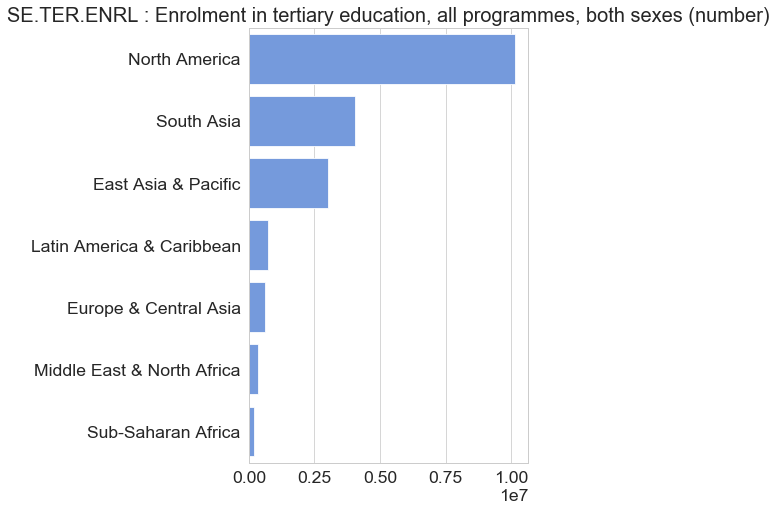



UIS.X.USCONST.3.FSGOV  : Aucune donnée à afficher.


<Figure size 360x576 with 0 Axes>

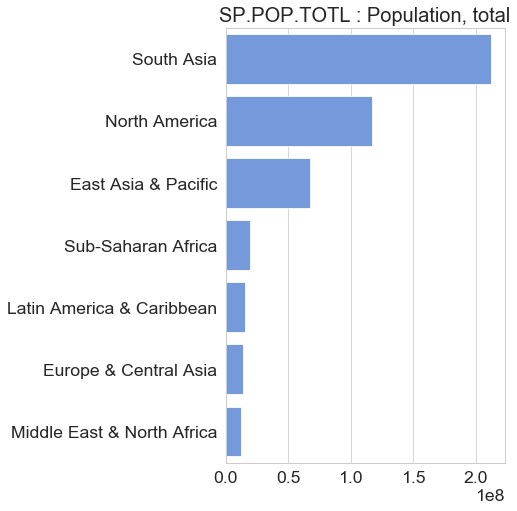

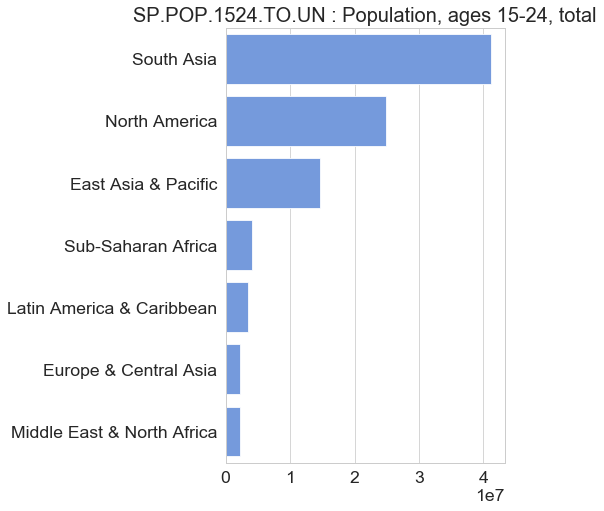

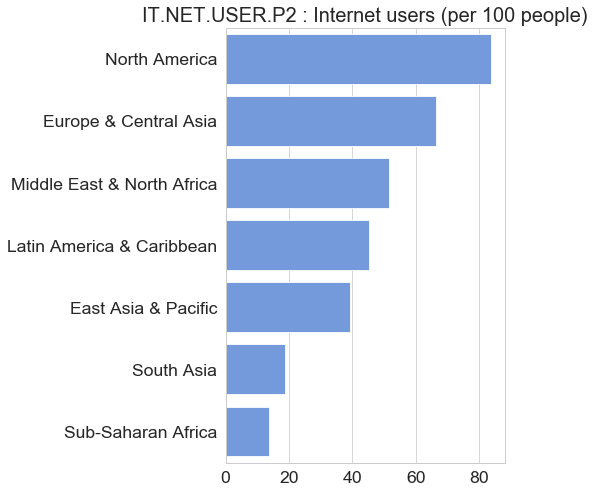

In [103]:
for indicateur in indicateurs:
    plt.figure(figsize = (5,8))
    sns.set_context("paper", font_scale=2)
    if data_orig[data_orig['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_orig[data_orig['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_countries.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_countries[(indicateur, 'mean')], y=description_countries['Region'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')

In [104]:
data_countries.head(2)

Country Name Country Code  \
92796  Afghanistan  AFG           
92829  Afghanistan  AFG           

                                                                Indicator Name  \
92796  Enrolment in post-secondary non-tertiary education, both sexes (number)   
92829  Enrolment in tertiary education, all programmes, both sexes (number)      

      Indicator Code     2010s      Region  
92796  UIS.E.4        96959.8   South Asia  
92829  SE.TER.ENRL    180189.0  South Asia

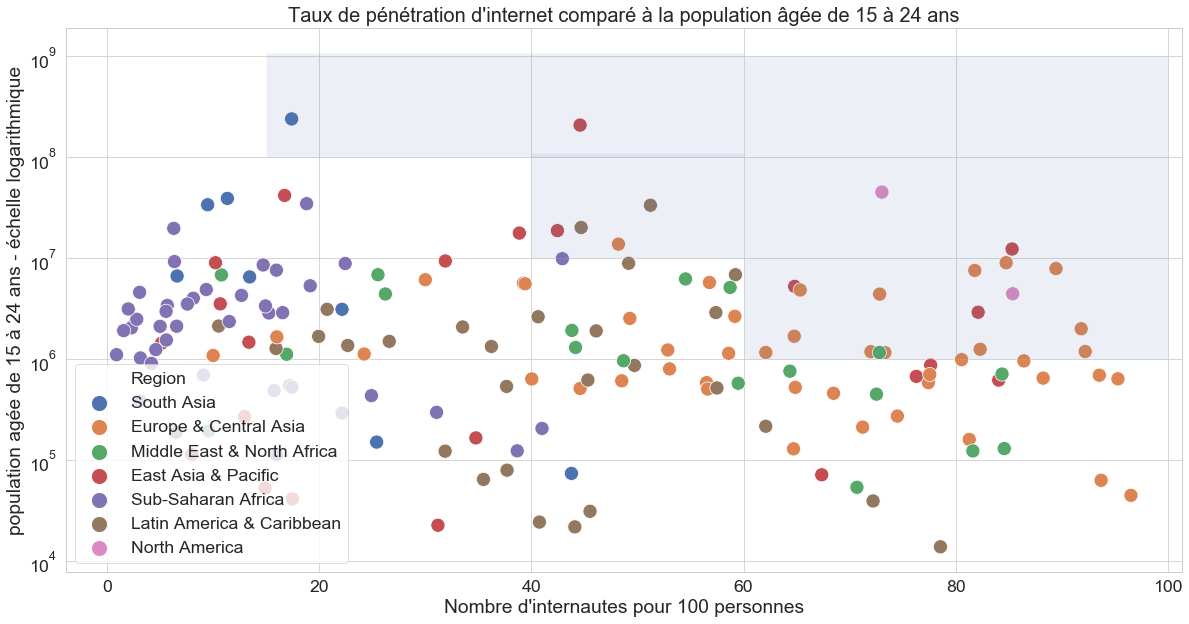

In [105]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_countries['IT.NET.USER.P2'], df_countries['SP.POP.1524.TO.UN'], hue=df_countries['Region'], s=200)
plt.xlabel('Nombre d\'internautes pour 100 personnes')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique')
plt.title('Taux de pénétration d\'internet comparé à la population âgée de 15 à 24 ans', size=20)
plt.show()

On imagine que les pays en bleu pourraient former un bon vivier de clients potentiels : 
* population jeune importante à très importante avec internet moyennement développé
* population jeune relativement importe conjuguée à un nombre d'internautes élevé

Il faut maintenant en avoir la confirmation en déterminant le nombre de clients potentiels

In [106]:
df_countries[((df_countries['IT.NET.USER.P2'] > 15) & (df_countries['SP.POP.1524.TO.UN'] > 100000000))  |  ((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

Country Name
78   India         
38   China         
189  United States 
86   Japan         
62   Germany       
188  United Kingdom
58   France        
106  Malaysia      
140  Poland        
32   Canada        
161  Spain         
10   Australia     
124  Netherlands   
12   Azerbaijan    
17   Belgium       
170  Sweden        
76   Hungary       
141  Portugal      
83   Israel        
45   Czech Republic

**Première analyse graphique avec les barplots**

* très important nombre de lycéens et d'étudiants dans le supérieur en East Asia & Pacific 
* taux de pénétration d'internet le plus élevé en amérique du nord, europe et asie centrale, moyen en east asia & pacific

            
            


Pour l'analyse, j'aimerais connaître :
* le nombre de lycéens et étudiants par pays:
* une estimation du nombre de lycéens avec internet par pays
* l\'évolution du taux de pénétration d'internet par pays

#### Quels sont les pays avec un fort potentiel de clients pour nos services ?

In [107]:
#on va créer un indicateur lycée + supérieur:

df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


Country Name     customers
78   India           8.103193e+07
38   China           8.083619e+07
189  United States   3.280134e+07
25   Brazil          1.774776e+07
86   Japan           7.552915e+06
14   Bangladesh      7.498949e+06
62   Germany         6.343626e+06
133  Pakistan        6.309889e+06
188  United Kingdom  5.770901e+06
139  Philippines     5.597267e+06
58   France          4.954075e+06
84   Italy           4.734863e+06
159  South Africa    4.045657e+06
140  Poland          3.574349e+06
39   Colombia        3.402088e+06
186  Ukraine         3.308591e+06
10   Australia       2.677543e+06
106  Malaysia        2.307053e+06
144  Romania         1.686599e+06
118  Morocco         1.641312e+06

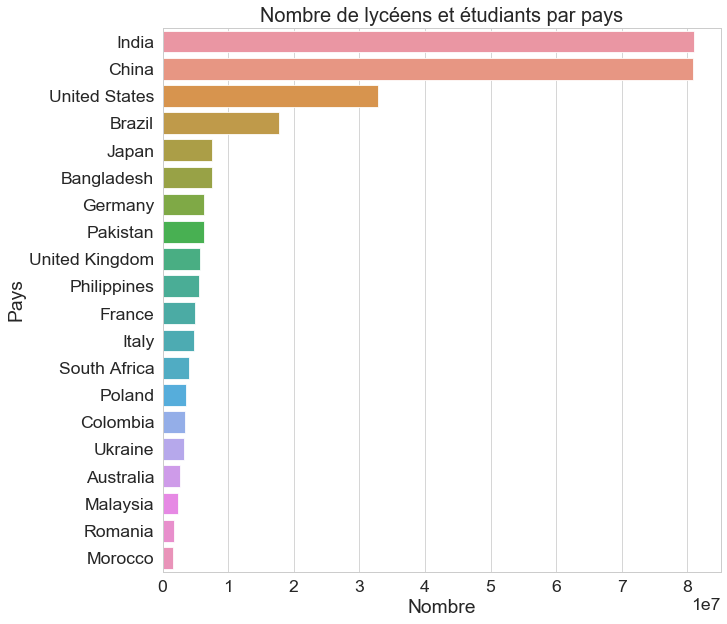

In [108]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), y=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

In [109]:
#on va multiplier ce nombre avec le taux de pénétration d'internet pour avoir une estimation du nombre de clients potentiels:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100

On peut avoir une estimation du nombre de clients potentiels en multipliant le nombre d'étudiants et lycéens par la part d'utilisation d'internet

In [110]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)

Country Name  IT.NET.USER.P2     customers  potential_customers
38   China           44.585731       8.083619e+07  3.604141e+07       
189  United States   73.035771       3.280134e+07  2.395671e+07       
78   India           17.399603       8.103193e+07  1.409923e+07       
25   Brazil          51.214529       1.774776e+07  9.089430e+06       
86   Japan           85.306401       7.552915e+06  6.443120e+06       
62   Germany         84.745271       6.343626e+06  5.375923e+06       
188  United Kingdom  89.441457       5.770901e+06  5.161578e+06       
58   France          81.789500       4.954075e+06  4.051913e+06       
84   Italy           56.780535       4.734863e+06  2.688480e+06       
139  Philippines     42.447732       5.597267e+06  2.375913e+06       
140  Poland          65.332414       3.574349e+06  2.335209e+06       
10   Australia       82.105767       2.677543e+06  2.198417e+06       
159  South Africa    42.912731       4.045657e+06  1.736102e+06       
39   Colombia        49.163197       3.402088e+06  1.672575e+06       
106  Malaysia        64.810759       2.307053e+06  1.495218e+06       
124  Netherlands     91.822593       1.511170e+06  1.387595e+06       
186  Ukraine         39.404974       3.308591e+06  1.303750e+06       
17   Belgium         82.295655       1.144504e+06  9.418769e+05       
118  Morocco         54.524967       1.641312e+06  8.949247e+05       
88   Kazakhstan      59.173667       1.480308e+06  8.759523e+05

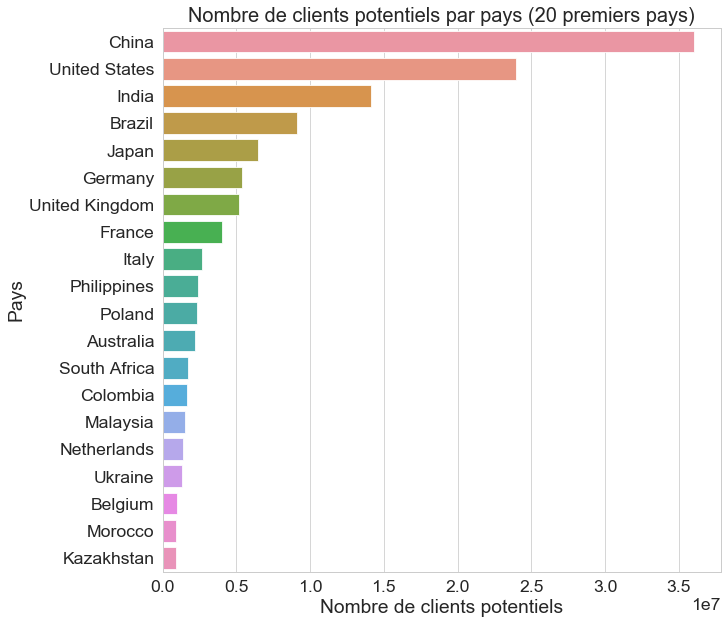

In [111]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [112]:
#on garde les pays potentiels avec plus de 1 million de clients potentiels
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)

['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']


**Maintenant qu'on a la liste des pays avec le plus de clients potentiels, il faut regarder:** 
* la tendance d'évolution du nombre d'étudiants
* l'évolution de l'implantation d'internet dans le pays

In [113]:
future = {}
for country in selected_countries:
    future[country] = (data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.3')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.4')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'SE.TER.ENRL')]['2020s'].values)*data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'IT.NET.USER.P2')]['2020s'].values/100

In [114]:
future

{'China': array([nan]),
 'United States': array([nan]),
 'India': array([nan]),
 'Brazil': array([nan]),
 'Japan': array([nan]),
 'Germany': array([nan]),
 'United Kingdom': array([nan]),
 'France': array([nan]),
 'Italy': array([nan]),
 'Philippines': array([nan]),
 'Poland': array([nan]),
 'Australia': array([nan]),
 'South Africa': array([nan]),
 'Colombia': array([nan]),
 'Malaysia': array([nan]),
 'Netherlands': array([nan]),
 'Ukraine': array([nan])}

In [115]:
data_final = data_orig[data_orig['Country Name'].isin(selected_countries) & data_orig['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]

In [116]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [117]:
data_final_melt['Year'] = data_final_melt['Year'].astype('int32')

In [118]:
data_final_melt = data_final_melt[data_final_melt['Year'] > 2010]

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


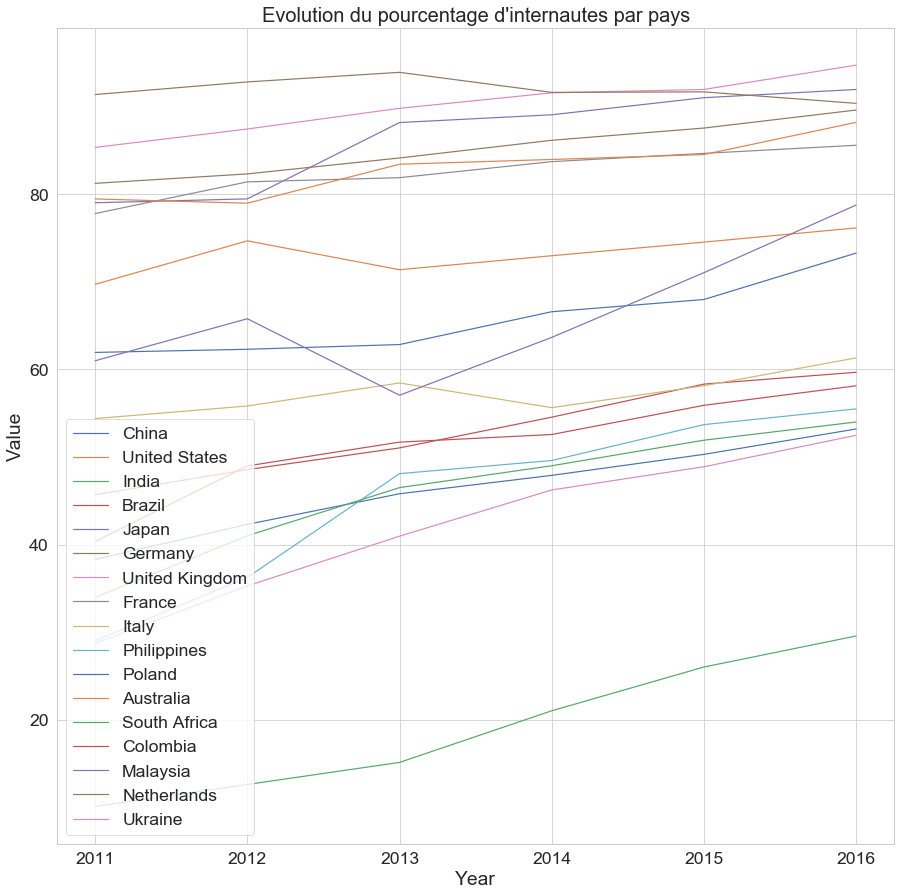

In [119]:
plt.figure(figsize = (15,15))
for country in selected_countries:
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()

Le graphe ne donne pas de projections après 2016 par contre il montre clairement une tendance haussière quasi linéaire. On peut donc estimer que les pays de notre liste ayant le moins accès à internet aujourd'hui verront leur part augmenter jusqu'au seuil de 80 %

In [120]:
#évolution de l'utilisation d'internet
for country in selected_countries:
    for year in data_final_melt['Year'].unique().tolist():
        data_final_melt = data_final_melt.append({'Country Name' : country,
                         'Country Code' : '',
                         'Indicator Name' : '',
                         'Indicator Code' : 'CUSTOM',
                         'Region' : '',
                         'Year' : int(year),
                         'Value' :  data_final_melt[data_final_melt['Indicator Code'] == 'UIS.E.3'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] + 
        data_final_melt[data_final_melt['Indicator Code'] == 'UIS.E.4'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] + 
        data_final_melt[data_final_melt['Indicator Code'] == 'SE.TER.ENRL'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]
                                     }
                                     , ignore_index = True)

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [121]:
for country in selected_countries:
    for year in data_final_melt['Year'].unique().tolist():
        data_final_melt = data_final_melt.append({'Country Name' : country,
                         'Country Code' : '',
                         'Indicator Name' : '',
                         'Indicator Code' : 'PRODUCT',
                         'Region' : '',
                         'Year' : int(year),
                         'Value' :  data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] * 
        data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]/100
                                     }
                                     , ignore_index = True)

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


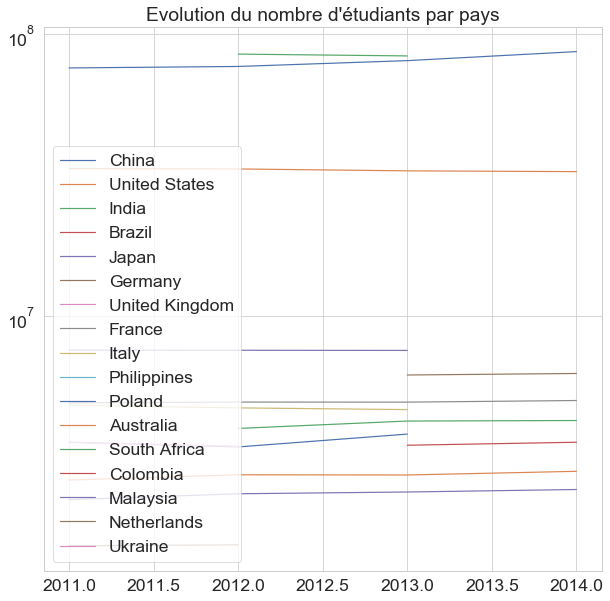

In [122]:
#évolution du nombre d'étudiants
plt.figure(figsize = (10,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left')
plt.title('Evolution du nombre d\'étudiants par pays')
plt.show()

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


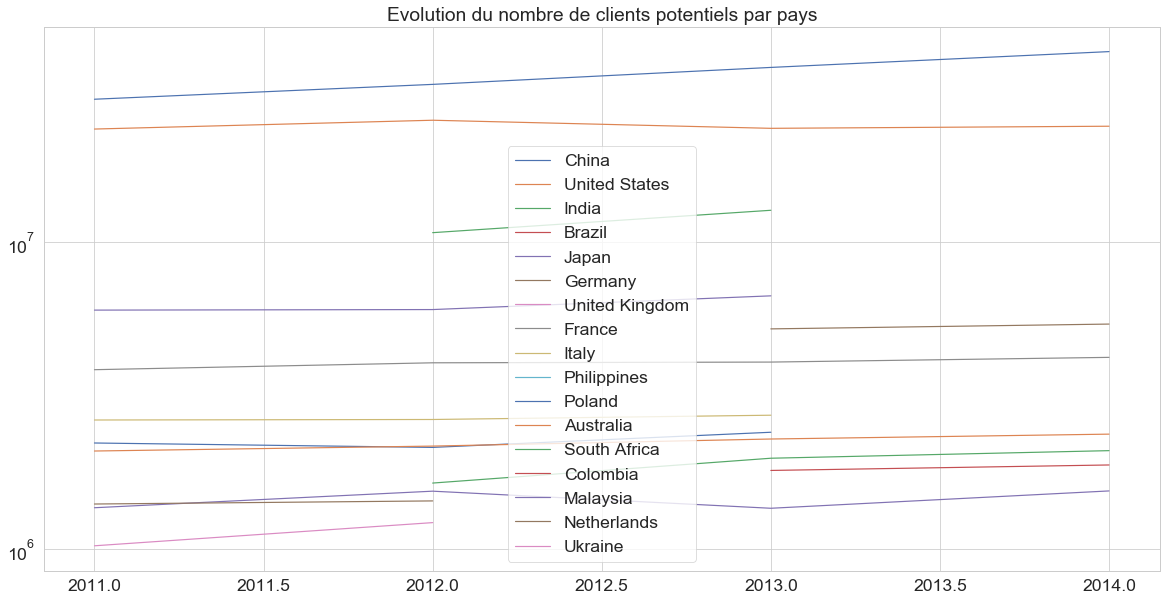

In [123]:
#évolution du nombre d'étudiants
plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries)
plt.title('Evolution du nombre de clients potentiels par pays')

plt.show()

Les données ne nous renseignent pas directement car on a pas de de données pour le futur. 
Par contre, on peut supposer :
* que les pays qui ont une tendance haussière importante du nombre de clients vont continuer à voir cette part croitre dans les prochaines années
* que les pays où internet est moins implanté vont continuer à voir l'utilisation d'internet augmenter, et donc le nombre de clients
* que les pays où les projections d'augmentation de la population sont importantes verront le nombre d'étudiants augmenter et donc le nombre de clients potentiels

In [124]:
data_final_melt

Country Name Country Code  \
0     Australia    AUS           
1     Australia    AUS           
2     Australia    AUS           
3     Australia    AUS           
4     Brazil       BRA           
...      ...       ...           
2443  Ukraine                    
2444  Ukraine                    
2445  Ukraine                    
2446  Ukraine                    
2447  Ukraine                    

                                                               Indicator Name  \
0     Enrolment in post-secondary non-tertiary education, both sexes (number)   
1     Enrolment in tertiary education, all programmes, both sexes (number)      
2     Enrolment in upper secondary education, both sexes (number)               
3     Internet users (per 100 people)                                           
4     Enrolment in post-secondary non-tertiary education, both sexes (number)   
...                                                                       ...   
2443                                                                            
2444                                                                            
2445                                                                            
2446                                                                            
2447                                                                            

      Indicator Code  Year         Value Region  
0     UIS.E.4         2011  2.559560e+05  NaN    
1     SE.TER.ENRL     2011  1.324257e+06  NaN    
2     UIS.E.3         2011  1.040865e+06  NaN    
3     IT.NET.USER.P2  2011  7.948770e+01  NaN    
4     UIS.E.4         2011 NaN            NaN    
...       ...          ...  ..            ...    
2443  PRODUCT         2080 NaN                   
2444  PRODUCT         2085 NaN                   
2445  PRODUCT         2090 NaN                   
2446  PRODUCT         2095 NaN                   
2447  PRODUCT         2100 NaN                   

[2448 rows x 7 columns]

In [125]:
potentiel = pd.DataFrame(columns = ['Country', 'Ecart à saturation internet', 'Potentiel clients'])
for country in data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'].sort_values(by='Value')['Country Name'].unique():
    implantation_internet = round(data_final_melt[(data_final_melt['Indicator Code'] == 'IT.NET.USER.P2') & (data_final_melt['Country Name'] == country) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0],2)
    if implantation_internet > 80 :
        implantation_internet = 80
    potentiel = pd.concat([potentiel, 
                          pd.DataFrame(
                              {'Country' : [country] ,
                               'Ecart à saturation internet' : [80 - implantation_internet],
                               'Potentiel clients' : [round((80 - implantation_internet) * data_final_melt[(data_final_melt['Indicator Code'] == 'CUSTOM') & (data_final_melt['Country Name'] == country ) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0]/100,0)]
                                      }
                          )]
             )

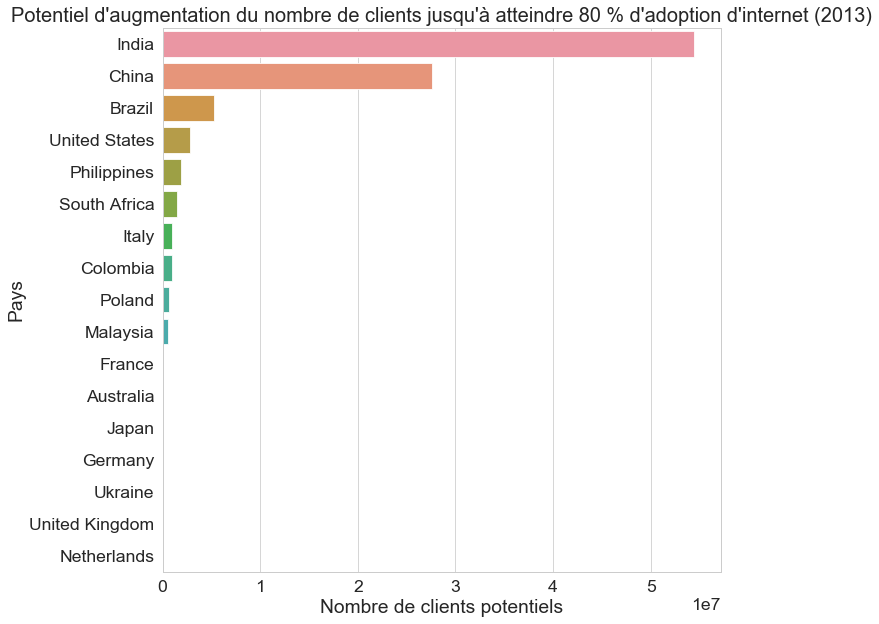

In [126]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = potentiel.sort_values(by='Potentiel clients', ascending=False)['Potentiel clients'], y = potentiel.sort_values(by='Potentiel clients', ascending=False)['Country'])
plt.title('Potentiel d\'augmentation du nombre de clients jusqu\'à atteindre 80 % d\'adoption d\'internet (2013)', size=20)
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

#### Dans quels pays l'entreprise doit-elle opérer en priorité ?

Tous les pays de la liste suivante seraient de bons candidats pour installer la société:

In [127]:
selected_countries

['China',
 'United States',
 'India',
 'Brazil',
 'Japan',
 'Germany',
 'United Kingdom',
 'France',
 'Italy',
 'Philippines',
 'Poland',
 'Australia',
 'South Africa',
 'Colombia',
 'Malaysia',
 'Netherlands',
 'Ukraine']

Néanmoins, quitte à cibler un nombre plus réduit de pays, l'analyse conduit à indiquer que les pays à cibler en priorité sont : 
* Chine
* Inde
* Etats Unis
* Brésil

### Conclusions sur la pertinence de l'usage du jeu de données

Dans l'idée et les indicateurs : le dataset est pertinent pour répondre à la problématique car il possède des données solides pour comparer les pays :
* tous les pays du monde sont abordés
* les indicateurs sont sourcés, les données peuvent être tracées
* le dataset comporte également des données démographiques
* le dataset comporte également des données de réussites à des tests
* le dataset comporte également des données d'investissement dans l'éducation

Mais à nuancer par le fait que :
* les indicateurs ont des répartitions de NaN assez distinctes. Il est assez compliqué de construire de nouveaux indicateurs à partir de ceux qu'on a déjà
* le jeu de données manque d'aspects qui pourraient être utiles à la problématique business : l'utilisation des elearnings / moocs dans les pays, l'argent dépensé sur internet, la proportion d'élèves se formant en dehors de leur établissement de référence, etc.
* on peut imaginer aussi que Academy cherche à réutiliser ses ressources existantes pour s'implanter dans certains pays : on imagine donc qu'il sera plus simple de s'implanter dans les pays occidentaux ou des pays ou la langue est la même.